# Final Project - Forecasting mutual funds yield 

Industrial Engineering and Management specializing in Data Science

Group number: 48

Aviv Yefet 208495267

Chanan Jacobs 316090877

Odeya Rachamim 203660709

### import 

In [1]:

import math 
import sklearn
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from datetime import datetime 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from pandas import Series,DataFrame
%matplotlib inline
sns.set_style('whitegrid')


import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error # mse
from sklearn.metrics import mean_absolute_error # mae
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import neighbors
from sklearn.linear_model import *
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
#import xgboost as xgb
from xgboost import XGBRegressor



### Load datasets

"K209" files of mutual fund in 2019

In [2]:
# "K209" files containing the monthly reports of mutual funds in 2019

Data1 = pd.read_csv('hodshi_012019.csv',encoding='UTF-8')
Data2 = pd.read_csv('hodshi_022019.csv',encoding='UTF-8')
Data3 = pd.read_csv('hodshi_032019.csv',encoding='UTF-8')
Data4 = pd.read_csv('hodshi_042019.csv',encoding='UTF-8')
Data5 = pd.read_csv('hodshi_052019.csv',encoding='UTF-8')
Data6 = pd.read_csv('hodshi_062019.csv',encoding='UTF-8')
Data7 = pd.read_csv('hodshi_072019.csv',encoding='UTF-8')
Data8 = pd.read_csv('hodshi_082019.csv',encoding='UTF-8')
Data9 = pd.read_csv('hodshi_092019.csv',encoding='UTF-8')
Data10 = pd.read_csv('hodshi_102019.csv',encoding='UTF-8')
Data11 = pd.read_csv('hodshi_112019.csv',encoding='UTF-8')
Data12 = pd.read_csv('hodshi_122019.csv',encoding='UTF-8')

print(Data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265756 entries, 0 to 265755
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   MISPAR MENAHE           265756 non-null  int64  
 1   MISPAR KEREN            265756 non-null  int64  
 2   SHEM KEREN              265756 non-null  object 
 3   PTUCHA/SGURA            261278 non-null  object 
 4   SHEM NECHES             265756 non-null  object 
 5   MISPAR NIYAR            265756 non-null  object 
 6   MISPAR MEZAHE           265756 non-null  int64  
 7   SUG MISPAR MEZAHE       265756 non-null  int64  
 8   TEUR SUG MISPAR MEZAHE  265756 non-null  object 
 9   KAMUT                   265756 non-null  float64
 10  SHOVI                   265756 non-null  int64  
 11  MECHIR                  265756 non-null  float64
 12  SHOVI MATBEA            265756 non-null  float64
 13  ACHUZ MIKEREN           265756 non-null  float64
 14  KAMUT HASHALA       

In [3]:
# merge files into a single file
Data = pd.concat([Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12], axis=0)
dict = {'MISPAR MENAHE':'Mannager_Number',
        'MISPAR KEREN':'Fund_Number',
        'SHEM KEREN':'Fund_Name',
        'PTUCHA/SGURA':'Fund_Type',
        'SHEM NECHES':'Asset_name',
        'MISPAR NIYAR':'Security_Num',
        'MISPAR MEZAHE':'Identity_Num',
        'SUG MISPAR MEZAHE':'Identity_Num_Type',
        'TEUR SUG MISPAR MEZAHE':'Identity_Num_Type_Describe',    
        'KAMUT':'Amount',
        'SHOVI':'Value',
        'MECHIR':'Price',
        'SHOVI MATBEA':'Currency_Value',
        'ACHUZ MIKEREN':'Precent_From_Fund',
        'KAMUT HASHALA':'lending_Ammount',
        'SUG MECHIR':'Price_Type',
        'MAKOM MISCHAR':'Country_of_trade',
        'SHUK MISCHAR':'Trading_Market', 
        'MATBEA':'Currency',
        'SHAAR MATBEA':'Currency_Rate',
        'KAMUT LEPIDION':'Redemption_Amount',
        'RIBIT ZVURA':'Accumalted_Intrest',
        'TICKER':'TICKER',
        'HITCHAYVUT':'Commitment',
        'DARGAT AGACH':'Degree_of_Bond',
        'KOD CHEVRA MEDAREGET':'Tiering_company_code',
        'KOD BANK':'Bank_code',
        'TAARICH DIVUCAH':'Report_Date',
        'MISPAR RESHUMA BATOFES':'Num_of_record_in_form',
        'MISPAR RESHUMUT':'Num_of_records',
        'MISPAR ASMACHTA':'Num_of_reference'}
Data.rename(columns=dict,inplace=True)

Data["Report_Date"] = pd.to_datetime(Data["Report_Date"])

list_data=[Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12]
for curr_data in list_data:
    curr_data.rename(columns=dict,inplace=True)  
    curr_data["Report_Date"] = pd.to_datetime(curr_data["Report_Date"])

In [4]:
Data

,Mannager_Number,Fund_Number,Fund_Name,Fund_Type,Asset_name,Security_Num,Identity_Num,Identity_Num_Type,Identity_Num_Type_Describe,Amount,...,Accumalted_Intrest,TICKER,Commitment,Degree_of_Bond,Tiering_company_code,Bank_code,Report_Date,Num_of_record_in_form,Num_of_records,Num_of_reference
0,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,טיב טעם הולדינגס 0.25שח ...,103010,1,1,"מס' בורסה ת""א",32945.0,...,0.0,TTAM,1,,0,31,2019-01-31,1,4717,2019-03-014685
1,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,ביטפארמס טכנו מר 0.01שח ...,1080241,1,1,"מס' בורסה ת""א",3243.0,...,0.0,BLLCF,1,,0,31,2019-01-31,2,4717,2019-03-014685
2,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,המלט 1 ...,1080324,1,1,"מס' בורסה ת""א",427.0,...,0.0,HAML,1,,0,31,2019-01-31,3,4717,2019-03-014685
3,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,רימוני מר 1 ...,1080456,1,1,"מס' בורסה ת""א",1059.0,...,0.0,RIMO,1,,0,31,2019-01-31,4,4717,2019-03-014685
4,511576209,5100946,אפסילון IM מניות ישראל 4A ...,פתוחה רגילה,אנליסט מ''ר 1 ...,1080613,1,1,"מס' בורסה ת""א",637.0,...,0.0,ANLT,1,,0,31,2019-01-31,5,4717,2019-03-014685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291332,513765339,5130380,PTF תלבונד בנקים וביטוח00 ...,קרן מחקה - קרן פתוחה,סך חודשי דמי שאילה ...,,329,0,,0.0,...,0.0,,0,,0,31,2019-12-31,43476,43480,2020-03-005743
291333,513765339,5130380,PTF תלבונד בנקים וביטוח00 ...,קרן מחקה - קרן פתוחה,הפסד הון תיאורטי נצבר ליום המסחר האחרון ...,,330,0,,0.0,...,0.0,,0,,0,31,2019-12-31,43477,43480,2020-03-005743
291334,513765339,5130380,PTF תלבונד בנקים וביטוח00 ...,קרן מחקה - קרן פתוחה,דמי ניהול משתנים מיום הבסיס ...,,331,0,,0.0,...,0.0,,0,,0,31,2019-12-31,43478,43480,2020-03-005743
291335,513765339,5130380,PTF תלבונד בנקים וביטוח00 ...,קרן מחקה - קרן פתוחה,חשיפה לסיכון אשראי - צד שלישי ...,,332,0,,0.0,...,0.0,,0,,0,0,2019-12-31,43479,43480,2020-03-005743


In [5]:
# Dataset columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311487 entries, 0 to 291336
Data columns (total 31 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Mannager_Number             int64         
 1   Fund_Number                 int64         
 2   Fund_Name                   object        
 3   Fund_Type                   object        
 4   Asset_name                  object        
 5   Security_Num                object        
 6   Identity_Num                int64         
 7   Identity_Num_Type           int64         
 8   Identity_Num_Type_Describe  object        
 9   Amount                      float64       
 10  Value                       int64         
 11  Price                       float64       
 12  Currency_Value              float64       
 13  Precent_From_Fund           float64       
 14  lending_Ammount             object        
 15  Price_Type                  int64         
 16  Country_of_trade   

#####  

Yearly yield 2019 file

In [6]:
#loading yearly yield file
Raw_year_Yield_data = pd.read_csv('year_yield.csv',encoding='UTF-8')

#clean data:
Raw_year_Yield_data = Raw_year_Yield_data[8:]
Raw_year_Yield_data.columns = Raw_year_Yield_data.iloc[0]
Raw_year_Yield_data = Raw_year_Yield_data[1:]
year_yield = Raw_year_Yield_data[["מס' קרן בבורסה", 'תשואה שקלית של הקרן']]
year_yield = year_yield.reset_index(drop = True)    
year_yield = year_yield[:2127]
dict = {"מס' קרן בבורסה":'Fund_Number','תשואה שקלית של הקרן':'Yearly_yield'}
year_yield.rename(columns=dict,inplace=True)
year_yield['Yearly_yield']=year_yield['Yearly_yield'].astype(float)
year_yield['Fund_Number']=year_yield['Fund_Number'].astype(int)
year_yield

8,Fund_Number,Yearly_yield
0,5119904,8.46
1,5125232,12.28
2,5125224,41.07
3,5125240,30.98
4,5112628,21.19
...,...,...
2122,5128814,-0.08
2123,5128426,21.14
2124,5130034,-0.75
2125,5123393,9.63


### Defining functions 

In [7]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [8]:
def remove_brackets(x):
    return x.replace('[', '').replace(']', '')

### Constants

In [9]:
NUM_OF_INTERVALS = 20

In [10]:
# The epsilon is used to perform a clip on the y_pred in order to convert y_pred into y_test intervals
CLIP_EPSILON = 0.0001

### 

### Creating MCFA - Monthly change in fund assets variable

In [11]:
# first we will filter only assets from each month:
# Identity_Num column describes the asset ID. The column contains values from 1 to 99 that describe the assets type(stock, ETF, bond...)
# and values from 100 to 304 that describe the fund's commitment(deposits, liabilities..)

Month1_assets = Data1.loc[(Data1['Identity_Num']<100)]
Month2_assets = Data2.loc[(Data2['Identity_Num']<100)]
Month3_assets = Data3.loc[(Data3['Identity_Num']<100)]
Month4_assets = Data4.loc[(Data4['Identity_Num']<100)]
Month5_assets = Data5.loc[(Data5['Identity_Num']<100)]
Month6_assets = Data6.loc[(Data6['Identity_Num']<100)]
Month7_assets = Data7.loc[(Data7['Identity_Num']<100)]
Month8_assets = Data8.loc[(Data8['Identity_Num']<100)]
Month9_assets = Data9.loc[(Data9['Identity_Num']<100)]
Month10_assets = Data10.loc[(Data10['Identity_Num']<100)]
Month11_assets = Data11.loc[(Data11['Identity_Num']<100)]
Month12_assets = Data12.loc[(Data12['Identity_Num']<100)]



In [12]:
Month1_assets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155064 entries, 0 to 265705
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Mannager_Number             155064 non-null  int64         
 1   Fund_Number                 155064 non-null  int64         
 2   Fund_Name                   155064 non-null  object        
 3   Fund_Type                   153658 non-null  object        
 4   Asset_name                  155064 non-null  object        
 5   Security_Num                155064 non-null  object        
 6   Identity_Num                155064 non-null  int64         
 7   Identity_Num_Type           155064 non-null  int64         
 8   Identity_Num_Type_Describe  155064 non-null  object        
 9   Amount                      155064 non-null  float64       
 10  Value                       155064 non-null  int64         
 11  Price                       155064 non-

Creation of a "Assets_unique" table containing for each fund and each asset the number of assets units throughout 2019

In [13]:

Assets_unique = pd.DataFrame(Data[['Fund_Number','Fund_Name','Identity_Num','Security_Num', 'Asset_name']])
Assets_unique = Assets_unique.loc[(Assets_unique['Identity_Num']<100)] # filter only assetן
Assets_unique = (Assets_unique[['Fund_Number','Security_Num']].drop_duplicates()) # finding the unique assets for each fund throughout 2019


list_months = [Month1_assets,Month2_assets,Month3_assets,Month4_assets,Month5_assets,Month6_assets,Month7_assets,Month8_assets,Month9_assets,Month10_assets,Month11_assets,Month12_assets]

# for each fund and asset that existed throughout 2019, we will present the number of units each fund had throughout 2019
for i in range(len(list_months)):
    curr_month = list_months[i]
    curr_month = pd.DataFrame(curr_month[['Fund_Number','Security_Num','Amount']])
    curr_month['Amount'] = curr_month['Amount'].abs()
    curr_month = curr_month.drop_duplicates(subset = ['Fund_Number', 'Security_Num'],keep = 'last').reset_index(drop = True)
    Assets_unique = pd.merge(Assets_unique,curr_month,on = ['Fund_Number','Security_Num'],how ="left")
    curr_amount = ('Amount_month'+str(i+1))
    Assets_unique.rename(columns ={'Amount':curr_amount}, inplace=True)
    
Assets_unique = Assets_unique.fillna(0)

data_parameter2 = Assets_unique.copy()

Assets_unique

,Fund_Number,Security_Num,Amount_month1,Amount_month2,Amount_month3,Amount_month4,Amount_month5,Amount_month6,Amount_month7,Amount_month8,Amount_month9,Amount_month10,Amount_month11,Amount_month12
0,5100946,103010,32945.0,28300.0,4798.0,4798.0,4798.0,4798.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5100946,1080241,3243.0,3243.0,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5100946,1080324,427.0,339.0,591.0,497.0,361.0,361.0,361.0,361.0,361.0,469.0,390.0,390.0
3,5100946,1080456,1059.0,678.0,794.0,794.0,764.0,764.0,651.0,399.0,399.0,239.0,239.0,239.0
4,5100946,1080613,637.0,637.0,452.0,452.0,452.0,452.0,26.0,26.0,26.0,26.0,26.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2164818.0
266670,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2829509.0
266671,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,459434.0
266672,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2603231.0


In [14]:
# Sampling a line and comparing it to the Excel file to check that there is no error
#Assets_unique.sample()

MCFA variable calculation :
1. Calculation of the number of monthly change units for each fund
2. Calculation of the monthly amount of assets for each fund
3. Calculation of normalized MCFA variable

1. Calculation of the number of monthly change units for each fund

In [15]:
# Calculation of the number of change units for each asset

Test1 = pd.DataFrame(Assets_unique[['Fund_Number','Security_Num']])

Test1['Diff_month1_2'] = Assets_unique['Amount_month2']-Assets_unique['Amount_month1']
Test1['Diff_month2_3'] = Assets_unique['Amount_month3']-Assets_unique['Amount_month2']
Test1['Diff_month3_4'] = Assets_unique['Amount_month4']-Assets_unique['Amount_month3']
Test1['Diff_month4_5'] = Assets_unique['Amount_month5']-Assets_unique['Amount_month4']
Test1['Diff_month5_6'] = Assets_unique['Amount_month6']-Assets_unique['Amount_month5']
Test1['Diff_month6_7'] = Assets_unique['Amount_month7']-Assets_unique['Amount_month6']
Test1['Diff_month7_8'] = Assets_unique['Amount_month8']-Assets_unique['Amount_month7']
Test1['Diff_month8_9'] = Assets_unique['Amount_month9']-Assets_unique['Amount_month8']
Test1['Diff_month9_10'] = Assets_unique['Amount_month10']-Assets_unique['Amount_month9']
Test1['Diff_month10_11'] = Assets_unique['Amount_month11']-Assets_unique['Amount_month10']
Test1['Diff_month11_12'] = Assets_unique['Amount_month12']-Assets_unique['Amount_month11']

# if there is a change in the amount of assets from one month to the previous month, we will set a change unit of 1,
# if there is no change in the amount of assets, we will set the unit of change as 0

Test1.loc[Test1['Diff_month1_2'] != 0, 'Diff_month1_2'] = 1
Test1.loc[Test1['Diff_month2_3'] != 0, 'Diff_month2_3'] = 1
Test1.loc[Test1['Diff_month3_4'] != 0, 'Diff_month3_4'] = 1
Test1.loc[Test1['Diff_month4_5'] != 0, 'Diff_month4_5'] = 1
Test1.loc[Test1['Diff_month5_6'] != 0, 'Diff_month5_6'] = 1
Test1.loc[Test1['Diff_month6_7'] != 0, 'Diff_month6_7'] = 1
Test1.loc[Test1['Diff_month7_8'] != 0, 'Diff_month7_8'] = 1
Test1.loc[Test1['Diff_month8_9'] != 0, 'Diff_month8_9'] = 1
Test1.loc[Test1['Diff_month9_10'] != 0, 'Diff_month9_10'] = 1
Test1.loc[Test1['Diff_month10_11'] != 0, 'Diff_month10_11'] = 1
Test1.loc[Test1['Diff_month11_12'] != 0, 'Diff_month11_12'] = 1


In [16]:
#Test1

In [17]:
# For each fund the number of monthly change units is calculated

df_monthly_rate = Test1.groupby(['Fund_Number'])['Diff_month1_2'].sum().reset_index(name='sum_1_2')
df_monthly_rate['sum_2_3'] = Test1.groupby(['Fund_Number'])['Diff_month2_3'].sum().reset_index(name='sum_2_3').drop('Fund_Number',axis=1)
df_monthly_rate['sum_3_4'] = Test1.groupby(['Fund_Number'])['Diff_month3_4'].sum().reset_index(name='sum_3_4').drop('Fund_Number',axis=1)
df_monthly_rate['sum_4_5'] = Test1.groupby(['Fund_Number'])['Diff_month4_5'].sum().reset_index(name='sum_4_5').drop('Fund_Number',axis=1)
df_monthly_rate['sum_5_6'] = Test1.groupby(['Fund_Number'])['Diff_month5_6'].sum().reset_index(name='sum_5_6').drop('Fund_Number',axis=1)
df_monthly_rate['sum_6_7'] = Test1.groupby(['Fund_Number'])['Diff_month6_7'].sum().reset_index(name='sum_6_7').drop('Fund_Number',axis=1)
df_monthly_rate['sum_7_8'] = Test1.groupby(['Fund_Number'])['Diff_month7_8'].sum().reset_index(name='sum_7_8').drop('Fund_Number',axis=1)
df_monthly_rate['sum_8_9'] = Test1.groupby(['Fund_Number'])['Diff_month8_9'].sum().reset_index(name='sum_8_9').drop('Fund_Number',axis=1)
df_monthly_rate['sum_9_10'] = Test1.groupby(['Fund_Number'])['Diff_month9_10'].sum().reset_index(name='sum_9_10').drop('Fund_Number',axis=1)
df_monthly_rate['sum_10_11'] = Test1.groupby(['Fund_Number'])['Diff_month10_11'].sum().reset_index(name='sum_10_11').drop('Fund_Number',axis=1)
df_monthly_rate['sum_11_12'] = Test1.groupby(['Fund_Number'])['Diff_month11_12'].sum().reset_index(name='sum_11_12').drop('Fund_Number',axis=1)

df_monthly_rate = df_monthly_rate.set_index('Fund_Number')
#df_monthly_rate

2. Calculation of the monthly amount of assets for each fund

In [18]:
Assets_unique.loc[Assets_unique['Amount_month1'] != 0, 'Amount_month1'] = 1
Assets_unique.loc[Assets_unique['Amount_month2'] != 0, 'Amount_month2'] = 1
Assets_unique.loc[Assets_unique['Amount_month3'] != 0, 'Amount_month3'] = 1
Assets_unique.loc[Assets_unique['Amount_month4'] != 0, 'Amount_month4'] = 1
Assets_unique.loc[Assets_unique['Amount_month5'] != 0, 'Amount_month5'] = 1
Assets_unique.loc[Assets_unique['Amount_month6'] != 0, 'Amount_month6'] = 1
Assets_unique.loc[Assets_unique['Amount_month7'] != 0, 'Amount_month7'] = 1
Assets_unique.loc[Assets_unique['Amount_month8'] != 0, 'Amount_month8'] = 1
Assets_unique.loc[Assets_unique['Amount_month9'] != 0, 'Amount_month9'] = 1
Assets_unique.loc[Assets_unique['Amount_month10'] != 0, 'Amount_month10'] = 1
Assets_unique.loc[Assets_unique['Amount_month11'] != 0, 'Amount_month11'] = 1
Assets_unique.loc[Assets_unique['Amount_month12'] != 0, 'Amount_month12'] = 1

Assets_unique['sum'] = (Assets_unique['Amount_month1']+Assets_unique['Amount_month2']+Assets_unique['Amount_month3']+Assets_unique['Amount_month4']+Assets_unique['Amount_month5']+Assets_unique['Amount_month6']+Assets_unique['Amount_month7']+Assets_unique['Amount_month8']+Assets_unique['Amount_month9']+Assets_unique['Amount_month10']+Assets_unique['Amount_month11']+Assets_unique['Amount_month12'])
#Assets_unique

In [19]:
Assets_unique

,Fund_Number,Security_Num,Amount_month1,Amount_month2,Amount_month3,Amount_month4,Amount_month5,Amount_month6,Amount_month7,Amount_month8,Amount_month9,Amount_month10,Amount_month11,Amount_month12,sum
0,5100946,103010,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,5100946,1080241,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,5100946,1080324,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0
3,5100946,1080456,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0
4,5100946,1080613,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266669,5130380,6040323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
266670,5130380,6040422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
266671,5130380,6910137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
266672,5130380,7480155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [20]:
# Calculation of the amount of assets for each fund for each month
df_monthly_assets = Assets_unique.groupby(['Fund_Number'])['Amount_month2'].sum().reset_index(name='sum_1_2')
df_monthly_assets['sum_2_3'] = Assets_unique.groupby(['Fund_Number'])['Amount_month3'].sum().reset_index(name='amount4').drop('Fund_Number',axis=1)
df_monthly_assets['sum_3_4'] = Assets_unique.groupby(['Fund_Number'])['Amount_month4'].sum().reset_index(name='amount5').drop('Fund_Number',axis=1)
df_monthly_assets['sum_4_5'] = Assets_unique.groupby(['Fund_Number'])['Amount_month5'].sum().reset_index(name='amount6').drop('Fund_Number',axis=1)
df_monthly_assets['sum_5_6'] = Assets_unique.groupby(['Fund_Number'])['Amount_month6'].sum().reset_index(name='amount7').drop('Fund_Number',axis=1)
df_monthly_assets['sum_6_7'] = Assets_unique.groupby(['Fund_Number'])['Amount_month7'].sum().reset_index(name='amount8').drop('Fund_Number',axis=1)
df_monthly_assets['sum_7_8'] = Assets_unique.groupby(['Fund_Number'])['Amount_month8'].sum().reset_index(name='amount9').drop('Fund_Number',axis=1)
df_monthly_assets['sum_8_9'] = Assets_unique.groupby(['Fund_Number'])['Amount_month9'].sum().reset_index(name='amount10').drop('Fund_Number',axis=1)
df_monthly_assets['sum_9_10'] = Assets_unique.groupby(['Fund_Number'])['Amount_month10'].sum().reset_index(name='amount11').drop('Fund_Number',axis=1)
df_monthly_assets['sum_10_11'] = Assets_unique.groupby(['Fund_Number'])['Amount_month11'].sum().reset_index(name='amount12').drop('Fund_Number',axis=1)
df_monthly_assets['sum_11_12'] = Assets_unique.groupby(['Fund_Number'])['Amount_month12'].sum().reset_index(name='amount12').drop('Fund_Number',axis=1)

df_monthly_assets = df_monthly_assets.set_index('Fund_Number')
#df_monthly_assets

In [21]:
df_monthly_assets

,sum_1_2,sum_2_3,sum_3_4,sum_4_5,sum_5_6,sum_6_7,sum_7_8,sum_8_9,sum_9_10,sum_10_11,sum_11_12
Fund_Number,,,,,,,,,,,
1142538,30.0,31.0,31.0,31.0,31.0,33.0,34.0,35.0,36.0,36.0,37.0
1143700,45.0,48.0,47.0,41.0,50.0,50.0,54.0,42.0,52.0,47.0,48.0
1143718,143.0,144.0,142.0,138.0,144.0,148.0,152.0,136.0,147.0,145.0,149.0
1143726,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
1143734,20.0,20.0,18.0,24.0,23.0,18.0,22.0,25.0,24.0,23.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...
5231030,107.0,105.0,116.0,118.0,125.0,138.0,135.0,134.0,136.0,132.0,141.0
5231055,103.0,105.0,110.0,109.0,110.0,108.0,107.0,104.0,101.0,109.0,115.0
5231097,17.0,16.0,15.0,14.0,13.0,12.0,12.0,9.0,11.0,14.0,14.0


3. Calculation of normalized MCFA variable

In [22]:
# Normalize the variable by dividing the number of units of the monthly change by the monthly amount of assets

MCFA_df = df_monthly_rate.div(df_monthly_assets)
# Rename the column
MCFA_df.rename(columns={'sum_1_2': 'MCFA2','sum_2_3':'MCFA3','sum_3_4':'MCFA4','sum_4_5':'MCFA5','sum_5_6':'MCFA6','sum_6_7':'MCFA7','sum_7_8':'MCFA8','sum_8_9':'MCFA9','sum_9_10':'MCFA10','sum_10_11':'MCFA11','sum_11_12': 'MCFA12'}, inplace=True)


#MCFA_df.to_excel('MCFA.xlsx', index=True)

In [23]:
MCFA_df

,MCFA2,MCFA3,MCFA4,MCFA5,MCFA6,MCFA7,MCFA8,MCFA9,MCFA10,MCFA11,MCFA12
Fund_Number,,,,,,,,,,,
1142538,0.233333,0.612903,0.612903,0.580645,0.322581,0.151515,0.088235,0.114286,0.166667,0.055556,0.135135
1143700,1.355556,1.208333,1.276596,1.292683,1.120000,1.300000,1.277778,1.452381,1.134615,1.361702,1.250000
1143718,1.139860,1.118056,1.133803,1.115942,1.090278,1.114865,1.138158,1.191176,1.068027,1.096552,1.114094
1143726,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,1.000000,1.000000
1143734,0.750000,0.800000,0.944444,0.583333,0.608696,0.888889,0.590909,0.640000,0.666667,0.652174,0.458333
...,...,...,...,...,...,...,...,...,...,...,...
5231030,0.214953,0.266667,0.198276,0.152542,0.296000,0.391304,0.229630,0.298507,0.183824,0.265152,0.333333
5231055,0.145631,0.133333,0.109091,0.064220,0.227273,0.166667,0.046729,0.211538,0.069307,0.192661,0.269565
5231097,0.411765,0.312500,0.266667,0.357143,0.153846,0.083333,0.416667,1.000000,0.909091,0.642857,0.285714


In [24]:
# Sampling a line and comparing it to the Excel file to check that there is no error
# MCFA_df.sample()
# df_monthly_rate.loc[5116736,]
# df_monthly_assets.loc[5116736,]

### 

### Creating YCFA - Yearly change in fund assets variable

In [25]:
# Scheme of the monthly change units to obtain the number of yearly change units of the fund
df_monthly_rate['sum diff'] = (df_monthly_rate['sum_1_2']+df_monthly_rate['sum_2_3']+df_monthly_rate['sum_3_4']+df_monthly_rate['sum_4_5']+df_monthly_rate['sum_5_6']+df_monthly_rate['sum_6_7']+df_monthly_rate['sum_7_8']+df_monthly_rate['sum_8_9']+df_monthly_rate['sum_9_10']+df_monthly_rate['sum_10_11']) #+df_monthly_rate['sum_11_12'])

# Calculation of the annual average amount of assets for each fund
df_monthly_rate['average assets'] = (df_monthly_assets['sum_1_2']+df_monthly_assets['sum_2_3']+df_monthly_assets['sum_3_4']+df_monthly_assets['sum_4_5']+df_monthly_assets['sum_5_6']+df_monthly_assets['sum_6_7']+df_monthly_assets['sum_7_8']+df_monthly_assets['sum_8_9']+df_monthly_assets['sum_9_10']+df_monthly_assets['sum_10_11'])/11 #+df_monthly_assets['sum_11_12'])/12
df_monthly_rate

,sum_1_2,sum_2_3,sum_3_4,sum_4_5,sum_5_6,sum_6_7,sum_7_8,sum_8_9,sum_9_10,sum_10_11,sum_11_12,sum diff,average assets
Fund_Number,,,,,,,,,,,,,
1142538,7.0,19.0,19.0,18.0,10.0,5.0,3.0,4.0,6.0,2.0,5.0,93.0,29.818182
1143700,61.0,58.0,60.0,53.0,56.0,65.0,69.0,61.0,59.0,64.0,60.0,606.0,43.272727
1143718,163.0,161.0,161.0,154.0,157.0,165.0,173.0,162.0,157.0,159.0,166.0,1612.0,130.818182
1143726,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,52.0,4.636364
1143734,15.0,16.0,17.0,14.0,14.0,16.0,13.0,16.0,16.0,15.0,11.0,152.0,19.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231030,23.0,28.0,23.0,18.0,37.0,54.0,31.0,40.0,25.0,35.0,47.0,314.0,113.272727
5231055,15.0,14.0,12.0,7.0,25.0,18.0,5.0,22.0,7.0,21.0,31.0,146.0,96.909091
5231097,7.0,5.0,4.0,5.0,2.0,1.0,5.0,9.0,10.0,9.0,4.0,57.0,12.090909


In [26]:
df_monthly_rate

,sum_1_2,sum_2_3,sum_3_4,sum_4_5,sum_5_6,sum_6_7,sum_7_8,sum_8_9,sum_9_10,sum_10_11,sum_11_12,sum diff,average assets
Fund_Number,,,,,,,,,,,,,
1142538,7.0,19.0,19.0,18.0,10.0,5.0,3.0,4.0,6.0,2.0,5.0,93.0,29.818182
1143700,61.0,58.0,60.0,53.0,56.0,65.0,69.0,61.0,59.0,64.0,60.0,606.0,43.272727
1143718,163.0,161.0,161.0,154.0,157.0,165.0,173.0,162.0,157.0,159.0,166.0,1612.0,130.818182
1143726,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,52.0,4.636364
1143734,15.0,16.0,17.0,14.0,14.0,16.0,13.0,16.0,16.0,15.0,11.0,152.0,19.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231030,23.0,28.0,23.0,18.0,37.0,54.0,31.0,40.0,25.0,35.0,47.0,314.0,113.272727
5231055,15.0,14.0,12.0,7.0,25.0,18.0,5.0,22.0,7.0,21.0,31.0,146.0,96.909091
5231097,7.0,5.0,4.0,5.0,2.0,1.0,5.0,9.0,10.0,9.0,4.0,57.0,12.090909


In [27]:
# Normalize the variable by dividing the number of units of the yearly change by the average amount of assets

YCFA_df = df_monthly_rate[['sum diff','average assets']]
YCFA_df ['YCFA'] = YCFA_df['sum diff']/YCFA_df['average assets']


In [28]:
YCFA_df 

,sum diff,average assets,YCFA
Fund_Number,,,
1142538,93.0,29.818182,3.118902
1143700,606.0,43.272727,14.004202
1143718,1612.0,130.818182,12.322446
1143726,52.0,4.636364,11.215686
1143734,152.0,19.727273,7.705069
...,...,...,...
5231030,314.0,113.272727,2.772071
5231055,146.0,96.909091,1.506567
5231097,57.0,12.090909,4.714286


In [29]:
YCFA_df = swap_columns(YCFA_df,'sum diff', 'YCFA' )

In [30]:
YCFA_df

,YCFA,average assets,sum diff
Fund_Number,,,
1142538,3.118902,29.818182,93.0
1143700,14.004202,43.272727,606.0
1143718,12.322446,130.818182,1612.0
1143726,11.215686,4.636364,52.0
1143734,7.705069,19.727273,152.0
...,...,...,...
5231030,2.772071,113.272727,314.0
5231055,1.506567,96.909091,146.0
5231097,4.714286,12.090909,57.0


###  

### Creating MVCF - Monthly asset value change variable


1. Calculation of the absolute value of the change in the amount of asset units between one month and the previous month
2. Multiplying the monthly asset change by the asset unit value
3. Calculation of the monthly value change for each fund
4. division of the value of the monthly change in the net value of the fund's assets

1. Calculation of the absolute value of the change in the amount of asset units between one month and the previous month

In [31]:
parameter2 = pd.DataFrame(data_parameter2[['Fund_Number','Security_Num']])

parameter2['Diff_month1_2'] = data_parameter2['Amount_month2']-data_parameter2['Amount_month1']
parameter2['Diff_month2_3'] = data_parameter2['Amount_month3']-data_parameter2['Amount_month2']
parameter2['Diff_month3_4'] = data_parameter2['Amount_month4']-data_parameter2['Amount_month3']
parameter2['Diff_month4_5'] = data_parameter2['Amount_month5']-data_parameter2['Amount_month4']
parameter2['Diff_month5_6'] = data_parameter2['Amount_month6']-data_parameter2['Amount_month5']
parameter2['Diff_month6_7'] = data_parameter2['Amount_month7']-data_parameter2['Amount_month6']
parameter2['Diff_month7_8'] = data_parameter2['Amount_month8']-data_parameter2['Amount_month7']
parameter2['Diff_month8_9'] = data_parameter2['Amount_month9']-data_parameter2['Amount_month8']
parameter2['Diff_month9_10'] = data_parameter2['Amount_month10']-data_parameter2['Amount_month9']
parameter2['Diff_month10_11'] = data_parameter2['Amount_month11']-data_parameter2['Amount_month10']
parameter2['Diff_month11_12'] = data_parameter2['Amount_month12']-data_parameter2['Amount_month11']
parameter2

diff_df = parameter2
columns = diff_df.columns
columns = columns[2:]
diff_df[columns] = diff_df[columns].abs()


In [32]:
#diff_df

2. Multiplying the monthly asset change by the asset unit value

In [33]:
Assets_parmater2 = pd.DataFrame(Data[['Fund_Number','Security_Num','Identity_Num']])
Assets_parmater2 = Assets_parmater2.loc[(Assets_parmater2['Identity_Num']<100)]
Assets_parmater2 = (Assets_parmater2[['Fund_Number','Security_Num']].drop_duplicates())


list_months = [Month1_assets,Month2_assets,Month3_assets,Month4_assets,Month5_assets,Month6_assets,Month7_assets,Month8_assets,Month9_assets,Month10_assets,Month11_assets,Month12_assets]
for i in range(len(list_months)):
    curr_month = list_months[i]
    curr_month = pd.DataFrame(curr_month[['Fund_Number','Security_Num','Price']])
    curr_month = curr_month.drop_duplicates(subset = ['Fund_Number', 'Security_Num'],keep = 'last').reset_index(drop = True)
    Assets_parmater2 = pd.merge(Assets_parmater2,curr_month,on =['Fund_Number','Security_Num'],how ="left")
    curr_price = ('Price'+str(i+1))
    Assets_parmater2.rename(columns={'Price':curr_price}, inplace=True)
Assets_parmater2 = Assets_parmater2.fillna(0)
price_df = Assets_parmater2

#price_df

In [34]:
multiply_price_diff = pd.DataFrame(data_parameter2[['Fund_Number','Security_Num']])
multiply_price_diff['money_diff_month1_2'] = diff_df['Diff_month1_2']*price_df['Price2']/100
multiply_price_diff['money_diff_month2_3'] = diff_df['Diff_month2_3']*price_df['Price3']/100
multiply_price_diff['money_diff_month3_4'] = diff_df['Diff_month3_4']*price_df['Price4']/100
multiply_price_diff['money_diff_month4_5'] = diff_df['Diff_month4_5']*price_df['Price5']/100
multiply_price_diff['money_diff_month5_6'] = diff_df['Diff_month5_6']*price_df['Price6']/100
multiply_price_diff['money_diff_month6_7'] = diff_df['Diff_month6_7']*price_df['Price7']/100
multiply_price_diff['money_diff_month7_8'] = diff_df['Diff_month7_8']*price_df['Price8']/100
multiply_price_diff['money_diff_month8_9'] = diff_df['Diff_month8_9']*price_df['Price9']/100
multiply_price_diff['money_diff_month9_10'] = diff_df['Diff_month9_10']*price_df['Price10']/100
multiply_price_diff['money_diff_month10_11'] = diff_df['Diff_month10_11']*price_df['Price11']/100
multiply_price_diff['money_diff_month11_12'] = diff_df['Diff_month11_12']*price_df['Price12']/100

#multiply_price_diff

3. Calculation of the monthly value change for each fund

In [35]:
multiply_price_diff_fund = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month1_2'].sum().reset_index(name='Fund_money_diff_month1_2')
multiply_price_diff_fund['Fund_money_diff_month2_3'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month2_3'].sum().reset_index(name='Fund_money_diff_month2_3').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month3_4'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month3_4'].sum().reset_index(name='Fund_money_diff_month3_4').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month4_5'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month4_5'].sum().reset_index(name='Fund_money_diff_month4_5').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month5_6'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month5_6'].sum().reset_index(name='Fund_money_diff_month5_6').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month6_7'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month6_7'].sum().reset_index(name='Fund_money_diff_month6_7').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month7_8'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month7_8'].sum().reset_index(name='Fund_money_diff_month7_8').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month8_9'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month8_9'].sum().reset_index(name='Fund_money_diff_month8_9').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month9_10'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month9_10'].sum().reset_index(name='Fund_money_diff_month9_10').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month10_11'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month10_11'].sum().reset_index(name='Fund_money_diff_month10_11').drop('Fund_Number',axis=1)
multiply_price_diff_fund['Fund_money_diff_month11_12'] = multiply_price_diff.groupby(['Fund_Number'])['money_diff_month11_12'].sum().reset_index(name='Fund_money_diff_month11_12').drop('Fund_Number',axis=1)

#multiply_price_diff_fund

4. division of the value of the monthly change in the net value of the fund's assets

In [36]:
# Net Asset Value for each fund

list_data = [Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,Data11,Data12]

funds01 = multiply_price_diff_fund[['Fund_Number']]
total = []

for i in range(len(list_data)):
    month='month'+str(i+1)
    month=list_data[i]
    
    month=month.loc[(month['Identity_Num']==300)]
    curr0=month[['Fund_Number','Value']].reset_index(drop = True)
    total.append(curr0)
    
for i in range(len(total)):
    funds01=pd.merge(funds01,total[i],on =['Fund_Number'],how ="left")
funds01.columns.values[2] = "month2"
funds01.columns.values[3] = "month3"
funds01.columns.values[4] = "month4"
funds01.columns.values[5] = "month5"
funds01.columns.values[6] = "month6"
funds01.columns.values[7] = "month7"
funds01.columns.values[8] = "month8"
funds01.columns.values[9] = "month9"
funds01.columns.values[10] = "month10"
funds01.columns.values[11] = "month11"
funds01.columns.values[12] = "month12"

#funds01

In [37]:
rate2 = funds01[['Fund_Number']]
rate2['month1_2'] = multiply_price_diff_fund['Fund_money_diff_month1_2']/funds01['month2']
rate2['month2_3'] = multiply_price_diff_fund['Fund_money_diff_month2_3']/funds01['month3']
rate2['month3_4'] = multiply_price_diff_fund['Fund_money_diff_month3_4']/funds01['month4']
rate2['month4_5'] = multiply_price_diff_fund['Fund_money_diff_month4_5']/funds01['month5']
rate2['month5_6'] = multiply_price_diff_fund['Fund_money_diff_month5_6']/funds01['month6']
rate2['month6_7'] = multiply_price_diff_fund['Fund_money_diff_month6_7']/funds01['month7']
rate2['month7_8'] = multiply_price_diff_fund['Fund_money_diff_month7_8']/funds01['month8']
rate2['month8_9'] = multiply_price_diff_fund['Fund_money_diff_month8_9']/funds01['month9']
rate2['month9_10'] = multiply_price_diff_fund['Fund_money_diff_month9_10']/funds01['month10']
rate2['month10_11'] = multiply_price_diff_fund['Fund_money_diff_month10_11']/funds01['month11']
rate2['month11_12'] = multiply_price_diff_fund['Fund_money_diff_month11_12']/funds01['month12']   #try

# rate2_copy = rate2.copy()
# rate2_copy.drop('Fund_Number', axis=1,inplace = True)
# rate2_copy.drop('month11_12', axis=1,inplace = True)

# rate2['average'] = rate2_copy.apply(lambda x: x.mean(), axis=1) #try
# Rename the column
rate2.rename(columns={'month1_2': 'MVCF2','month2_3':'MVCF3','month3_4':'MVCF4','month4_5':'MVCF5','month5_6':'MVCF6','month6_7':'MVCF7','month7_8':'MVCF8','month8_9':'MVCF9','month9_10':'MVCF10','month10_11':'MVCF11','month11_12': 'MVCF12'}, inplace=True)

rate2.set_index('Fund_Number') # MVCF values

,MVCF2,MVCF3,MVCF4,MVCF5,MVCF6,MVCF7,MVCF8,MVCF9,MVCF10,MVCF11,MVCF12
Fund_Number,,,,,,,,,,,
1142538,0.000633,0.468504,0.258377,0.135271,0.234944,0.183561,0.009508,0.218265,0.172023,0.000047,0.216498
1143700,0.043943,0.049279,0.020381,0.027328,0.067437,0.046900,0.040885,0.078370,0.063184,0.047003,0.059555
1143718,0.050612,0.045445,0.027520,0.017441,0.128941,0.058541,0.032831,0.051612,0.060698,0.036113,0.112470
1143726,0.062173,0.026448,0.115403,0.031331,0.011185,0.078762,0.028167,0.099900,0.022195,0.028336,0.016373
1143734,0.142341,0.081986,0.091955,0.146705,0.003193,0.084797,0.101284,0.108668,0.079422,0.141524,0.134374
...,...,...,...,...,...,...,...,...,...,...,...
5231030,0.070317,0.090425,0.105121,0.050288,0.159257,0.140161,0.098378,0.176316,0.096826,0.103150,0.146042
5231055,0.086998,0.077874,0.219300,0.010602,0.049127,0.069920,0.011803,0.154947,0.002917,0.128543,0.155724
5231097,0.056128,0.011724,0.019775,0.021367,0.001241,0.000000,0.019382,0.035701,0.048833,0.080184,0.038947


## Creating YVCF - Yearly asset value change variable


In [38]:
rate2_copy = rate2.copy()
rate2_copy.drop('MVCF12', axis=1,inplace = True)

rate2_copy['average'] = rate2_copy.iloc[:, 1:].apply(lambda x: x.mean(), axis=1) #try

rate2_yearly = rate2_copy[['Fund_Number','average']]

rate2_yearly.rename(columns={'average':'rate2'}, inplace=True)
rate2_yearly.rename(columns={'rate2':'YVCF'}, inplace=True)

rate2_yearly.set_index('Fund_Number') 

,YVCF
Fund_Number,
1142538,0.168113
1143700,0.048471
1143718,0.050975
1143726,0.050390
1143734,0.098188
...,...
5231030,0.109024
5231055,0.081203
5231097,0.029433


# 

## Calculation of monthly yield

In [39]:
Data = Data.reset_index(drop = True)  

yield_data = Data[['Report_Date','Fund_Number','Fund_Name', 'Identity_Num','Amount', 'Value']]
yield_data["Report_Date"] = pd.to_datetime(yield_data["Report_Date"])

#yield_data

In [40]:
#the group 300 represnts the total value of fund
#the group 300 represnts the amount of total assets of fund
groups = [300,301]

yield_data = yield_data[yield_data['Identity_Num'].isin(groups)]
yield_data = yield_data.sort_values(['Fund_Number','Report_Date'], ascending=(True,True))
yield_data = yield_data.reset_index(drop = True)  

rows = len(yield_data.axes[0])
cols = len(yield_data.axes[1])
  
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

yield_data['month'] = pd.DatetimeIndex(yield_data['Report_Date']).month
#yield_data.head(20)

Number of Rows: 50232
Number of Columns: 6


In [41]:
# We will move the asset value column down one row in order to calculate the unit price of each fund
yield_data = yield_data.sort_values(['Fund_Number','Report_Date','Identity_Num'], ascending=(True,True,True))
yield_data['Value'] = yield_data.Value.shift(1)
yield_data.reset_index(drop = True)
yield_data.head()


#### We will remove all the empty rows and the ID number column
yield_data = yield_data[yield_data.Amount != 0]
yield_data = yield_data.drop('Identity_Num',axis=1)
yield_data = yield_data.reset_index(drop = True)
#yield_data


In [42]:
#yield_data

In [43]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25115 entries, 0 to 25114
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Report_Date  25115 non-null  datetime64[ns]
 1   Fund_Number  25115 non-null  int64         
 2   Fund_Name    25115 non-null  object        
 3   Amount       25115 non-null  float64       
 4   Value        25115 non-null  float64       
 5   month        25115 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.1+ MB


 Dataset cleaning

In [44]:
#yield_data[yield_data['Fund_Number']==5129523] 

In [45]:
yield_data.drop(index=24580, inplace=True)
yield_data.drop(index=24581, inplace=True)
yield_data[yield_data['Fund_Number']==5129523] 

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month
24582,2019-09-26,5129523,הר כספית פקדון נקוב $ ...,89732.0,314248.0,9
24583,2019-10-31,5129523,הר כספית פקדון נקוב $ ...,102747.0,363631.0,10
24584,2019-11-27,5129523,הר כספית פקדון נקוב $ ...,112803.0,393200.0,11
24585,2019-12-31,5129523,הר כספית פקדון נקוב $ ...,683748.0,2379545.0,12


In [46]:
#yield_data[yield_data['Fund_Number']==1144427] 

# In the data analysis we saw that the fund has an Infinity value for a reason for month 5 reporting twice
#so we will remove this value

In [47]:
yield_data.drop(index=701, inplace=True)

In [48]:
yield_data[yield_data['Fund_Number']==1144427] 

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month
697,2019-01-31,1144427,תכ.EUSTOXX50 ...,208889.0,30857875.0,1
698,2019-02-28,1144427,תכלית סל (4D) ‏‏EUR ST50 ...,206153.0,31343325.0,2
699,2019-03-28,1144427,תכ.EUSTOXX50 ...,207961.0,31517515.0,3
700,2019-04-30,1144427,תכ.EUSTOXX50 ...,211861.0,33847100.0,4
702,2019-05-30,1144427,תכ.EUSTOXX50 ...,210797.0,32201976.0,5
703,2019-06-27,1144427,תכ.EUSTOXX50 ...,202818.0,32365428.0,6
704,2019-07-31,1144427,תכ.EUSTOXX50 ...,191463.0,29554235.0,7
705,2019-08-29,1144427,תכ.EUSTOXX50 ...,187005.0,28447743.0,8
706,2019-09-26,1144427,תכ.EUSTOXX50 ...,184806.0,28594261.0,9
707,2019-10-31,1144427,תכ.EUSTOXX50 ...,173040.0,28043975.0,10


In [49]:
# 1. We will perform a calculation for the unit price - which is equal to the property value divided by the number of units.
# 2. We will create a yield column which is the rate of change in percentages between the current month's unit price and the previous month's
yield_data['Price_YECHIDA'] = yield_data.Value/yield_data.Amount # Unit price calculation
yield_data['yield'] = yield_data['Price_YECHIDA'].pct_change() # Monthly yield


In [50]:
yield_data

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield
0,2019-01-31,1142538,איביאי (Tech Fund (5D ...,403144606.0,400503965.0,1,0.993450,NaN
1,2019-02-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,406261884.0,2,1.007732,0.014377
2,2019-03-28,1142538,איביאי (Tech Fund (5D ...,403144606.0,411243664.0,3,1.020090,0.012262
3,2019-04-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,418644844.0,4,1.038448,0.017997
4,2019-05-30,1142538,איביאי (Tech Fund (5D ...,403144606.0,414296637.0,5,1.027663,-0.010386
...,...,...,...,...,...,...,...,...
25110,2019-08-29,5520044,מיטב סקיי (4D) השקעות ...,2406615.0,13298765.0,8,5.525921,-0.009160
25111,2019-09-26,5520044,מיטב סקיי (4D) השקעות ...,2408636.0,13817398.0,9,5.736607,0.038127
25112,2019-10-31,5520044,מיטב סקיי (4D) השקעות ...,2407656.0,14205739.0,10,5.900236,0.028524
25113,2019-11-27,5520044,מיטב סקיי (4D) השקעות ...,2445678.0,14659667.0,11,5.994112,0.015910


#### 1. We will create a temporary column that will check a change in the number of a fund in order to neutralize incorrect calculations in which we calculated a return for a different fund as can be seen in row 12
#### 2. In rows where the difference between one fund number and another is not 0 we will change the value in the return row to the NAN value

In [ ]:
## yield_data['change']=yield_data['Fund_Number'].diff()
yield_data.loc[yield_data['change'] != 0, 'yield'] = np.nan
yield_data=yield_data.drop('change',axis=1)
#yield_data

In [52]:
df_nan=yield_data.loc[(yield_data['yield'].isnull()==True) & (yield_data['month']!= 1)]
#df_nan


In [53]:
sa=yield_data.loc[(yield_data['Fund_Number']==1161132)]
#sa

In [54]:
sa=yield_data.loc[(yield_data['Fund_Number']==5130281)]
#sa

In [55]:
sa

,Report_Date,Fund_Number,Fund_Name,Amount,Value,month,Price_YECHIDA,yield
24797,2019-11-27,5130281,תכלית(D4 )TTF OldAgeREIT) ...,32317530.0,32740022.0,11,1.013073,NaN
24798,2019-12-31,5130281,תכלית(D4 )TTF OldAgeREIT) ...,60612993.0,61498663.0,12,1.014612,0.001519


In [56]:
#yield_data.info()

In [57]:
#yield_data[yield_data['Fund_Number']==1144427] 

In [58]:
# yield_data[yield_data['Fund_Number']==5129523] 

# 

# 

# Forecasting mutual fund yield

1. Yield forecast for the 12th month
2. Yearly yield forecast
3. Monthly yield forecast

### Evaluation metrics for regression models

In [59]:
import math 
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error # mse
from sklearn.metrics import mean_absolute_error # mae
from sklearn.model_selection import train_test_split


def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape


### Yield forecast for the 12th month

Preparing a data set for the prediction

In [60]:
# loading 'Funds_info' file which contains parameters about the mutual funds
df = pd.read_csv('Funds_info.csv',encoding='UTF-8')

In [61]:
avg_1_3 = yield_data.loc[(yield_data['month']>=1) & (yield_data['month']<=3)]# Average yield for month 1 to 3
avg_1_3 = avg_1_3.groupby(['Fund_Number'])['yield'].mean().reset_index(name='avg_1_3')

avg_4_6 = yield_data.loc[(yield_data['month']>=4) & (yield_data['month']<=6)]# Average yield for month 4 to 6
avg_4_6 = avg_4_6.groupby(['Fund_Number'])['yield'].mean().reset_index(name='avg_4_6')

avg_7_9 = yield_data.loc[(yield_data['month']>=7) & (yield_data['month']<=9)]# Average yield for month 7 to 9
avg_7_9 = avg_7_9.groupby(['Fund_Number'])['yield'].mean().reset_index(name='avg_7_9')

avg_10_11 = yield_data.loc[(yield_data['month']>=10) & (yield_data['month']<=11)]# Average yield for month 10 to 11
avg_10_11 = avg_10_11.groupby(['Fund_Number'])['yield'].mean().reset_index(name='avg_10_11')

avg_df = avg_1_3.merge(avg_4_6, on=['Fund_Number'],how ="left").merge(avg_7_9, on=['Fund_Number'],how ="left").merge(avg_10_11, on=['Fund_Number'],how ="left")

# Merging 'average' table with 'Data' table
predict_yield = pd.merge(avg_df,Data[['Fund_Number','Fund_Type']],on =['Fund_Number'],how ="left")

# The dependent variable - the yield in the 12th month
y_month_12 = yield_data.loc[yield_data['month']==12]
y_month_12 = y_month_12[['Fund_Number','yield']].reset_index(drop = True)

#predict_yield = pd.merge(predict_yield,y_month_12,on =['Fund_Number'],how ="left") 

# loading 'Funds_info' file which contains parameters about the mutual funds
df = pd.read_csv('Funds_info.csv',encoding='UTF-8')

# Selecting the independent variables from 'Funds_info' file
df1 = df[['Fund_Number','main_header','exposure_profile','leveraged_fund','Imitator_fund','kosher','mannager_wage','trustee_salary','ta_policy','Reverse_exposure_fund','Fixed_deadlines_fund']]

# Merging 'predict_yield' table with 'df1' table
# Taking only the data for the funds that appear in 2019 and in the Funds_info file
# There are some funds that appear in 2019 and do not appear in the Funds_info file, therefore we will lose some of the funds
predict_yield = pd.merge(predict_yield,df1,on =['Fund_Number'],how ="inner") 

predict_yield = predict_yield.drop_duplicates(subset = ['Fund_Number', 'Fund_Type'],keep = 'last').reset_index(drop = True)



df_mannager = Data[['Fund_Number','Mannager_Number']]

df_mannager = df_mannager.drop_duplicates(subset = ['Fund_Number', 'Mannager_Number'],keep = 'last').reset_index(drop = True)
predict_yield = pd.merge(predict_yield,df_mannager,on =['Fund_Number'],how ="left")
predict_yield = predict_yield.drop_duplicates(subset = ['Fund_Number'],keep = 'last').reset_index(drop = True)


In [62]:
predict_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fund_Number            1631 non-null   int64  
 1   avg_1_3                1619 non-null   float64
 2   avg_4_6                1631 non-null   float64
 3   avg_7_9                1631 non-null   float64
 4   avg_10_11              1631 non-null   float64
 5   Fund_Type              1628 non-null   object 
 6   main_header            1631 non-null   object 
 7   exposure_profile       1631 non-null   object 
 8   leveraged_fund         1631 non-null   object 
 9   Imitator_fund          1631 non-null   object 
 10  kosher                 1631 non-null   object 
 11  mannager_wage          1631 non-null   float64
 12  trustee_salary         1631 non-null   float64
 13  ta_policy              1631 non-null   object 
 14  Reverse_exposure_fund  1631 non-null   object 
 15  Fixe

In [63]:
print(predict_yield['Fund_Type'].isnull().sum())

Fund_Type_null = predict_yield[predict_yield['Fund_Type'].isnull()]
Fund_Type_null   

# All three funds are classified as a closed-end fund

3


,Fund_Number,avg_1_3,avg_4_6,avg_7_9,avg_10_11,Fund_Type,main_header,exposure_profile,leveraged_fund,Imitator_fund,kosher,mannager_wage,trustee_salary,ta_policy,Reverse_exposure_fund,Fixed_deadlines_fund,Mannager_Number
162,1146349,-0.004618,0.016010,0.012515,0.014744,NaN,מניות בארץ,4A,לא,כן,ל,0.25,0.015,פטורה,לא,לא,510938608
173,1146463,0.005612,0.005071,0.005180,0.021719,NaN,"מניות בחו""ל",4D,לא,כן,ל,0.55,0.030,פטורה,לא,לא,510938608
242,1147321,0.000798,0.005644,-0.010163,0.053579,NaN,"מניות בחו""ל",4A,לא,כן,ל,0.60,0.030,פטורה,לא,לא,510938608


In [64]:
# Updating the types of funds to 'closed-end fund'
predict_yield.iloc[[162,173,242],[5]] = 'קרן סל - קרן סגורה'

print(predict_yield['Fund_Type'].isnull().sum() )

0


In [65]:
predict_yield = predict_yield.sort_values(['Fund_Number'], ascending=(True))
predict_yield = predict_yield.reset_index(drop = True)  


In [66]:
predict_yield

,Fund_Number,avg_1_3,avg_4_6,avg_7_9,avg_10_11,Fund_Type,main_header,exposure_profile,leveraged_fund,Imitator_fund,kosher,mannager_wage,trustee_salary,ta_policy,Reverse_exposure_fund,Fixed_deadlines_fund,Mannager_Number
0,1142538,0.013320,0.002686,0.005623,0.017030,קרן טכנולוגיה עילית - קרן סגורה,קרן סגורה,5D,לא,לא,ל,1.30,0.10,פטורה,לא,לא,510791031
1,1143700,-0.003654,0.012231,0.004000,0.026479,קרן סל - קרן סגורה,מניות בארץ,40,לא,כן,ל,0.25,0.02,פטורה,לא,לא,513534974
2,1143718,0.001678,0.015804,0.010709,0.029732,קרן סל - קרן סגורה,מניות בארץ,40,לא,כן,ל,0.20,0.02,פטורה,לא,לא,513534974
3,1143726,0.002623,0.030261,0.009271,0.023483,קרן סל - קרן סגורה,מניות בארץ,40,לא,כן,ל,0.50,0.02,פטורה,לא,לא,513534974
4,1143734,0.027585,0.014948,0.003104,0.041193,קרן סל - קרן סגורה,"מניות בחו""ל",4A,לא,כן,ל,0.80,0.03,פטורה,לא,לא,513534974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,5131479,0.004941,0.003755,0.004145,0.000389,פתוחה רגילה,"אג""ח בארץ - כללי",0A,לא,לא,ל,0.55,0.04,פטורה,לא,לא,511303661
1627,5231030,0.009328,0.003473,0.005805,0.008904,פתוחה רגילה,"אג""ח בארץ - חברות והמרה",2B,לא,לא,ל,0.55,0.04,פטורה,לא,לא,511776783
1628,5231055,0.004801,0.004387,0.004540,0.004836,פתוחה רגילה,"אג""ח בארץ - כללי",0B,לא,לא,ל,0.60,0.04,פטורה,לא,לא,511776783
1629,5231097,0.000396,-0.003024,-0.005919,-0.002518,פתוחה רגילה,קרן כספית,0D,לא,לא,ל,0.78,0.03,פטורה,לא,לא,511776783


In [67]:
# להסביר על המדד ואיך הוא חושב

a = yield_data.loc[yield_data['month']!= 12].groupby(['Fund_Number'])['Value'].mean().reset_index(name='Average_value')
a['quartile'] = pd.qcut(a['Average_value'],4,[1,2,3,4])
b = a.drop(['Average_value'],axis=1)

predict_yield = pd.merge(predict_yield,b,on =['Fund_Number'],how ="left")
predict_yield['mannager_wage'] = predict_yield['mannager_wage']/100 #מספר עשרוני שמייצג אחוזים
predict_yield['trustee_salary'] = predict_yield['trustee_salary']/100

YCFA_df.reset_index( inplace=True)
rate1 = YCFA_df[['Fund_Number','YCFA']]
rate2 = rate2_yearly[['Fund_Number','YVCF']]

predict_yield = pd.merge(predict_yield,rate1,on =['Fund_Number'],how ="left")
predict_yield = pd.merge(predict_yield,rate2,on =['Fund_Number'],how ="left")
predict_yield = pd.merge(predict_yield,y_month_12,on =['Fund_Number'],how ="left") #הוספת התשואה בחודש ה12 עבור כל קרן נאמנות 

predict_yield['Mannager_Number'] = pd.Categorical(predict_yield.Mannager_Number)
predict_yield['quartile'] = predict_yield['quartile'].astype(int)

#predict_yield = swap_columns(predict_yield, 'yield' , )


In [68]:
predict_yield.info() #There are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 0 to 1630
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Fund_Number            1631 non-null   int64   
 1   avg_1_3                1619 non-null   float64 
 2   avg_4_6                1631 non-null   float64 
 3   avg_7_9                1631 non-null   float64 
 4   avg_10_11              1631 non-null   float64 
 5   Fund_Type              1631 non-null   object  
 6   main_header            1631 non-null   object  
 7   exposure_profile       1631 non-null   object  
 8   leveraged_fund         1631 non-null   object  
 9   Imitator_fund          1631 non-null   object  
 10  kosher                 1631 non-null   object  
 11  mannager_wage          1631 non-null   float64 
 12  trustee_salary         1631 non-null   float64 
 13  ta_policy              1631 non-null   object  
 14  Reverse_exposure_fund  1631 non-null   o

In [69]:
#predict_yield.rename(columns={'rate2':'YVCF'}, inplace=True)
#predict_yield[['yield','Average_yield','Fund_Type','Mannager_Number','YCFA','YVCF','quartile','main_header','mannager_wage','trustee_salary','exposure_profile','leveraged_fund','Imitator_fund','kosher','Reverse_exposure_fund','Fixed_deadlines_fund','ta_policy']]


#### 

Convert categorical variable into dummy variables

In [70]:
# Convert binary variable into 1\0 values
predict_yield.loc[predict_yield['leveraged_fund'] == "כן", 'leveraged_fund'] = 1
predict_yield.loc[predict_yield['leveraged_fund'] == "לא", 'leveraged_fund'] = 0
predict_yield.loc[predict_yield['Imitator_fund'] == "כן", 'Imitator_fund'] = 1
predict_yield.loc[predict_yield['Imitator_fund'] == "לא", 'Imitator_fund'] = 0
predict_yield.loc[predict_yield['kosher'] == "ל", 'kosher'] = 0
predict_yield.loc[predict_yield['kosher'] == "כ", 'kosher'] = 1

predict_yield.loc[predict_yield['Reverse_exposure_fund'] == "כן", 'Reverse_exposure_fund'] = 1
predict_yield.loc[predict_yield['Reverse_exposure_fund'] == "לא", 'Reverse_exposure_fund'] = 0

predict_yield.loc[predict_yield['Fixed_deadlines_fund'] == "כן", 'Fixed_deadlines_fund'] = 1
predict_yield.loc[predict_yield['Fixed_deadlines_fund'] == "לא", 'Fixed_deadlines_fund'] =0

predict_yield_bin = predict_yield[['Fund_Number','leveraged_fund','Imitator_fund','kosher','Reverse_exposure_fund','Fixed_deadlines_fund']]

#predict_yield_bin

In [71]:
dummies = pd.get_dummies(predict_yield[['Fund_Number','avg_10_11','avg_7_9','avg_4_6','avg_1_3','Fund_Type','main_header','exposure_profile','mannager_wage','trustee_salary','ta_policy','Mannager_Number','quartile','YCFA','YVCF','yield']])
#dummies

The final table which contains the independent variables and the dependent variable

In [72]:
predict_yield = pd.merge(dummies,predict_yield_bin,on =['Fund_Number'],how ="left")


predict_yield = swap_columns(predict_yield, 'yield' , 'Fund_Number')
Data_for_predict1 = predict_yield.drop('Fund_Number',axis=1)


Data_for_predict1.rename(columns={'yield':'yield_month_12'}, inplace=True)

Data_for_predict1.rename(columns={'Average_yield':'Average_yield_month_1_11'}, inplace=True)

#Data_for_predict1

In [73]:
Data_for_predict1.dropna(inplace = True)

In [74]:
Data_for_predict1

,yield_month_12,avg_10_11,avg_7_9,avg_4_6,avg_1_3,mannager_wage,trustee_salary,quartile,YCFA,YVCF,...,Mannager_Number_513534974,Mannager_Number_513765339,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund
0,0.013992,0.017030,0.005623,0.002686,0.013320,0.0130,0.0010,4,3.118902,0.168113,...,0,0,0,0,0,0,0,0,0,0
1,-0.011421,0.026479,0.004000,0.012231,-0.003654,0.0025,0.0002,4,14.004202,0.048471,...,1,0,0,0,0,0,1,0,0,0
2,-0.005475,0.029732,0.010709,0.015804,0.001678,0.0020,0.0002,4,12.322446,0.050975,...,1,0,0,0,0,0,1,0,0,0
3,0.004890,0.023483,0.009271,0.030261,0.002623,0.0050,0.0002,4,11.215686,0.050390,...,1,0,0,0,0,0,1,0,0,0
4,0.032469,0.041193,0.003104,0.014948,0.027585,0.0080,0.0003,4,7.705069,0.098188,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,-0.001371,0.000389,0.004145,0.003755,0.004941,0.0055,0.0004,3,4.555154,0.139609,...,0,0,0,0,0,0,0,0,0,0
1627,0.003170,0.008904,0.005805,0.003473,0.009328,0.0055,0.0004,2,2.772071,0.109024,...,0,0,0,0,0,0,0,0,0,0
1628,0.003086,0.004836,0.004540,0.004387,0.004801,0.0060,0.0004,3,1.506567,0.081203,...,0,0,0,0,0,0,0,0,0,0
1629,-0.002096,-0.002518,-0.005919,-0.003024,0.000396,0.0078,0.0003,2,4.714286,0.029433,...,0,0,0,0,0,0,0,0,0,0


In [75]:
Data_for_predict1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619 entries, 0 to 1630
Data columns (total 89 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   yield_month_12                             1619 non-null   float64
 1   avg_10_11                                  1619 non-null   float64
 2   avg_7_9                                    1619 non-null   float64
 3   avg_4_6                                    1619 non-null   float64
 4   avg_1_3                                    1619 non-null   float64
 5   mannager_wage                              1619 non-null   float64
 6   trustee_salary                             1619 non-null   float64
 7   quartile                                   1619 non-null   int32  
 8   YCFA                                       1619 non-null   float64
 9   YVCF                                       1619 non-null   float64
 10  Fund_Type_פתוחה רגילה   

In [76]:
evaluation_metrics_df = pd.DataFrame(index=['MAE','MSE','RMSE','MAPE','R2'])

In [77]:
evaluation_metrics_intervals_df = pd.DataFrame(index=['MAE','MSE','RMSE','MAPE','R2'])

### 

In [78]:
def execute(model, x_train, y_train):
    # Fit the grid search to the training data
    model.fit(x_train, y_train)
    try:
        # Get the best estimator
        best_est = model.best_estimator_
        
        # Predict using the best estimator
        y_pred = best_est.predict(x_test)
        
        # Print the best parameter and score
        print("Best parameter: ", model.best_params_)
        print("Best score: ", model.best_score_)

    except Exception as e:
        return None, None
    
    return y_pred, best_est

def meas(y_test, y_pred, model_name, metric_df):
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred) 
    rmse = math.sqrt(mse) 
    r2 = r2_score(y_test, y_pred)
    mape = MAPE(y_test,y_pred)

    print("mae: {}".format(mae))
    print("mse: {}".format(mse))
    print("rmse: {}".format(rmse))
    print("mape: {}".format(mape))
    print("r2: {}".format(r2))
    
    # Update evaluation_metrics_df with the resualts
    metric_df.loc['MAE', model_name] = mae
    metric_df.loc['MSE', model_name] = mse
    metric_df.loc['RMSE', model_name] = rmse
    metric_df.loc['MAPE', model_name] = mape
    metric_df.loc['R2', model_name] = r2

    return mse, mae, rmse, r2, mape

def plot_y_test_dist(y_test, num_of_bins):
    plt.figure(figsize=(10,5))

    sns.histplot(y_test,bins=num_of_bins,color='purple')

    xhead = "Y_test yield"
    yhead = "Frequency"
    head  = "Y-test distribution"

    plt.xlabel(xhead, fontweight='bold')
    plt.ylabel(yhead, fontweight='bold')
    plt.title(head, fontweight='bold')
    
    plt.show()

    
def plot_feature_importance(model, x_df, model_name):
    importances = model.feature_importances_

    # Sort the feature importances in descending order
    sorted_indices = importances.argsort()[::-1]
    sorted_importances = importances[sorted_indices]

    # Get the names of the features
    feature_names = x_df.columns[sorted_indices][:10]

    # Plot the feature importances
    plt.figure(figsize=(7, 5))
    plt.bar(range(len(sorted_importances[:10])), sorted_importances[:10], tick_label=feature_names)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance - '+ model_name)
    plt.xticks(rotation=90)
    plt.show()
    
    
def build_intervals(y_test, n_intervals):
    interval_range = np.linspace(min(y_test)-0.001, max(y_test)+0.001, n_intervals+1)
    
    labels = [i+1 for i in range(n_intervals)]

    # create variables for test target 
    y_test_intervals = pd.cut(y_test, bins=interval_range, labels=labels)

    y_test_intervals_values = pd.cut(y_test, bins=interval_range)

    interval = pd.DataFrame({"Interval ":labels,"Count of samples":y_test_intervals_values.value_counts().sort_index()})

    # Interval map
    interval.to_csv('intervalmap.csv', index=False)
    
    Ytest = y_test_intervals.value_counts().sort_index()  # Ytest interval frequency
    
    x_ticks_labels = [ str(i+1) + " " + "[" + str(round(interval_range[i], 3)) + ", " + str(round(interval_range[i+1],3)) + "]" for i in range(len(labels))]

    plt.bar(labels, Ytest, 0.4, label = 'Ytest')

    plt.xticks(labels, x_ticks_labels, rotation=90)
    plt.xlabel("Interval")
    plt.ylabel("Frequency")
    plt.title("Distribution of y_test interval ")
    plt.legend()

    plt.show()

    return interval, interval_range, labels, y_test_intervals,

def measure_binned_model(y_pred, interval_range, labels, y_test_intervals, compare_test_df, n_intervals, model_name ,metric_df):
    
    y_pred = np.clip(y_pred, interval_range[0] + CLIP_EPSILON, interval_range[-1] - CLIP_EPSILON)
    y_pred_intervals = pd.cut(y_pred, bins=interval_range, labels=labels)
    
    # compare the actual and predicted values
    compare_df = pd.DataFrame({'Actual': y_test_intervals, 'Predicted': y_pred_intervals})

    # use value_counts function to count number of values in each bin
    data_counts_test = y_test_intervals.value_counts().sort_index()
    data_counts_pred = y_pred_intervals.value_counts().sort_index()
    
    print("Measurements based on interval indexs")
    y_pred_intervals = y_pred_intervals.astype(int)
    y_test_intervals = y_test_intervals.astype(int)
    
    mae = mean_absolute_error(y_test_intervals, y_pred_intervals)
    mse = mean_squared_error(y_test_intervals, y_pred_intervals) 
    rmse = math.sqrt(mse) 
    r2 = r2_score(y_test_intervals, y_pred_intervals)
    mape = MAPE(y_test_intervals,y_pred_intervals)

    print("mae: {}".format(mae))
    print("mse: {}".format(mse))
    print("rmse: {}".format(rmse))
    print("mape: {}".format(mape))
    print("r2: {}".format(r2))
    
     # Update evaluation_metrics_df with the resualts
    metric_df.loc['MAE', model_name] = mae
    metric_df.loc['MSE', model_name] = mse
    metric_df.loc['RMSE', model_name] = rmse
    metric_df.loc['MAPE', model_name] = mape
    metric_df.loc['R2', model_name] = r2
    
    abs_diff = np.abs(y_test_intervals - y_pred_intervals)

    # Plot absolute difference distribution
    
    plt.figure(figsize=(7, 5))
    sns.histplot(abs_diff, kde=False)
    plt.xlabel('Absolute Difference')
    plt.ylabel('Frequency')
    plt.title('Distribution of Absolute Difference')
    plt.show()
    
    #תשואה מול חזוי גרנילציה
    compare_df.to_csv('compare_df.csv', index=False)

    return compare_df, y_pred_intervals

def create_test_df(Ytest,Ypred):
    Ypred = Ypred.flatten().tolist()
    test = pd.DataFrame({"y_test":Ytest,"y_pred":Ypred})

    test.to_csv('Linear1test.csv', index=False)
    test.reset_index(inplace=True)
    test
    
    return test, Ypred


Dependent and Independent variables

In [156]:
Xmonth = Data_for_predict1.iloc[:, 1:].values
Ymonth = Data_for_predict1.iloc[:,0:1].values #The yield in the 12th month

Training and testing sets 

In [157]:
x_train, x_test, y_train, y_test = train_test_split(Xmonth, Ymonth,test_size=0.2,random_state=0)

Standardization

In [158]:
scaler = StandardScaler()
scaler = StandardScaler().fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[ 4.19451277, -2.2744359 , -1.50434225, ..., -0.34954786,
        -0.09255797, -0.03932926],
       [-0.81366545, -0.59490266, -0.64442756, ..., -0.34954786,
        -0.09255797, -0.03932926],
       [-0.59131936,  0.52084212, -0.13160442, ...,  2.86083854,
        -0.09255797, -0.03932926],
       ...,
       [-0.59034024, -0.03242852, -0.31101408, ..., -0.34954786,
        -0.09255797, -0.03932926],
       [-0.52225659,  0.08945328, -0.20550559, ..., -0.34954786,
        -0.09255797, -0.03932926],
       [-0.28677731,  0.11869407, -0.24145544, ..., -0.34954786,
        -0.09255797, -0.03932926]])

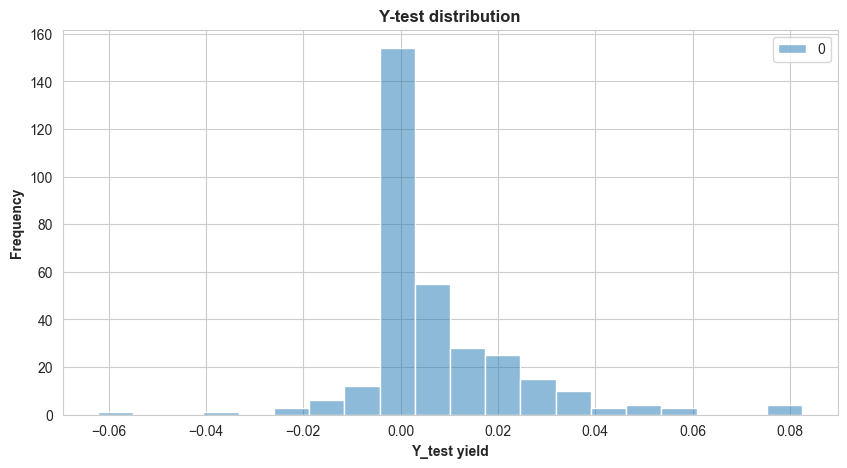

In [159]:
plot_y_test_dist(y_test, 20)

In [160]:
Data_for_predict1.iloc[:,0:1].describe() #  12th month yield describe

,yield_month_12
count,1619.000000
mean,0.007824
std,0.016188
min,-0.098610
25%,-0.000509
50%,0.002193
75%,0.012786
max,0.119238


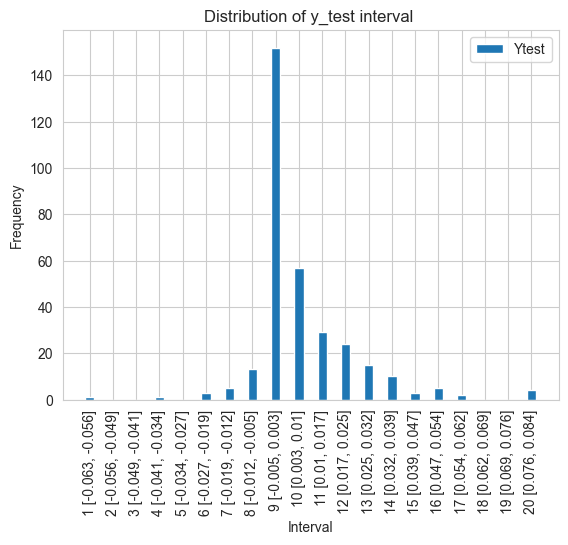

,Interval,Count of samples
"(-0.0632, -0.0559]",1,1
"(-0.0559, -0.0486]",2,0
"(-0.0486, -0.0412]",3,0
"(-0.0412, -0.0339]",4,1
"(-0.0339, -0.0265]",5,0
"(-0.0265, -0.0192]",6,3
"(-0.0192, -0.0119]",7,5
"(-0.0119, -0.00453]",8,13
"(-0.00453, 0.0028]",9,152
"(0.0028, 0.0101]",10,57


In [161]:
y_test = y_test.flatten().tolist()
interval, interval_range, labels, y_test_intervals = build_intervals(y_test, NUM_OF_INTERVALS)
interval

In [162]:
# interval range:

print ("interval range: ",round(0.0395-0.0468,4))

interval range:  -0.0073


#### 

#### Linear Regression

In [163]:
lrm_regressor = LinearRegression()

y_pred, best_est = execute(lrm_regressor, x_train, y_train)
y_pred = lrm_regressor.predict(x_test) # Linear Regression is a bit different

mse, mae, rmse, r2, mape = meas(y_test, y_pred,'Linear Regression',evaluation_metrics_df)

mae: 0.006993085741847975
mse: 0.0001493108597612564
rmse: 0.012219282293214132
mape: 842.3612275777547
r2: 0.41383272219475775


In [164]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.008130,0.038688
1,1,-0.003095,0.001684
2,2,-0.001141,-0.004212
3,3,0.000669,0.000688
4,4,0.005507,0.004276
...,...,...,...
319,319,-0.000140,0.016738
320,320,-0.016429,-0.017212
321,321,0.001844,-0.000169
322,322,-0.000541,0.000601


In [165]:
# print regression coefficients

reg_coef = pd.DataFrame({"Feature":Data_for_predict1.iloc[:, 1:].columns.tolist(),"Coefficients":lrm_regressor.coef_[0]})
reg_coef = reg_coef.sort_values('Coefficients', ascending=(False))
reg_coef.head(10)

,Feature,Coefficients
5,trustee_salary,8.664768
3,avg_1_3,0.243490
0,avg_10_11,0.213254
4,mannager_wage,0.054799
27,main_header_סחורות,0.039385
60,exposure_profile_6F,0.020509
8,YVCF,0.012446
55,exposure_profile_5C,0.009300
26,"main_header_מניות בחו""ל",0.007251
23,main_header_ממונפות,0.004968


 Binning

Measurements based on interval indexs
mae: 0.9567901234567902
mse: 3.0
rmse: 1.7320508075688772
mape: 11.072460783789758
r2: 0.3855147344328955


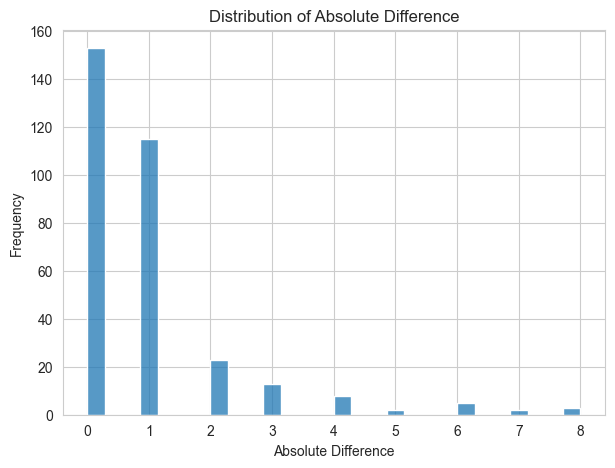

,Actual,Predicted
0,10,14
1,9,9
2,9,9
3,9,9
4,10,10
...,...,...
319,9,11
320,7,7
321,9,9
322,9,9


In [90]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'Linear Regression',evaluation_metrics_intervals_df)
compare_df

#### Lasso Regression

In [92]:
# Create a Lasso regression model
lasso = Lasso()

# Set up a grid of hyperparameter values to search over
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 0.2, 0.5, 1, 5, 10]}

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)

y_pred, best_est = execute(grid_search, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'Lasso Regression',evaluation_metrics_df)

Best parameter:  {'alpha': 0.0001}
Best score:  0.3624315183374396
mae: 0.007660169726900608
mse: 0.00017409260325082737
rmse: 0.013194415608537855
mape: 411.5674683500374
r2: 0.31654410471725725


In [93]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.008130,0.021265
1,1,-0.003095,0.003900
2,2,-0.001141,-0.003479
3,3,0.000669,0.002860
4,4,0.005507,0.003010
...,...,...,...
319,319,-0.000140,0.019496
320,320,-0.016429,0.001408
321,321,0.001844,-0.001439
322,322,-0.000541,0.002425


In [94]:
# print lasso coefficients

lasso_coef = pd.DataFrame({"Feature":Data_for_predict1.iloc[:, 1:].columns.tolist(),"Coefficients":best_est.coef_})
lasso_coef = lasso_coef.sort_values('Coefficients', ascending=(False))
lasso_coef.head(10)

,Feature,Coefficients
26,"main_header_מניות בחו""ל",0.014802
27,main_header_סחורות,0.012115
8,YVCF,0.008630
54,exposure_profile_4D,0.006381
12,Fund_Type_קרן סל - קרן סגורה,0.003909
25,main_header_מניות בארץ,0.003300
51,exposure_profile_4A,0.001317
72,Mannager_Number_511944670,0.000739
66,Mannager_Number_510938608,0.000492
49,exposure_profile_3D,0.000000


Measurements based on interval indexs
mae: 1.0617283950617284
mse: 3.450617283950617
rmse: 1.8575837219222764
mape: 12.77970055543585
r2: 0.29321550730038803


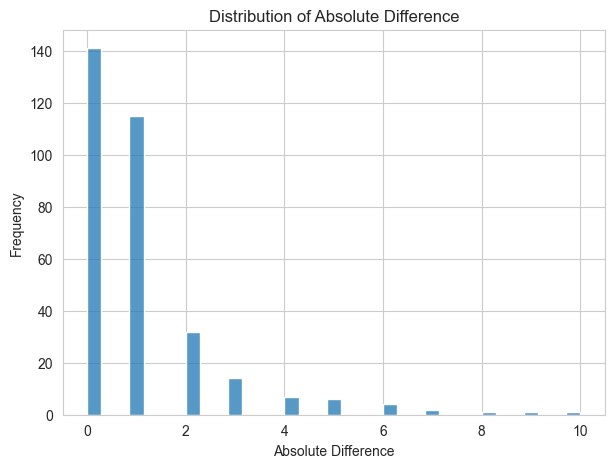

,Actual,Predicted
0,10,12
1,9,10
2,9,9
3,9,10
4,10,10
...,...,...
319,9,12
320,7,9
321,9,9
322,9,9


In [95]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'Lasso Regression',evaluation_metrics_intervals_df)
compare_df

#### Random Forest

In [96]:
#Define the hyperparameter grid

param_grid = {
    'n_estimators': [200, 400, 1000],  # Number of trees in the forest
    'max_depth': [5, 7, 11],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 7],  # Minimum number of samples required to be at a leaf node
}

# Create a random forest classifier
rf = RandomForestRegressor()

# Set up the grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf, param_grid, cv=5)

y_pred, best_est = execute(grid_search_rf, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'Random Forest',evaluation_metrics_df)

Best parameter:  {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.6314548230607573
mae: 0.005448479013915368
mse: 0.0001156870336351192
rmse: 0.010755790702459732
mape: 299.57419326473655
r2: 0.5458337478486789


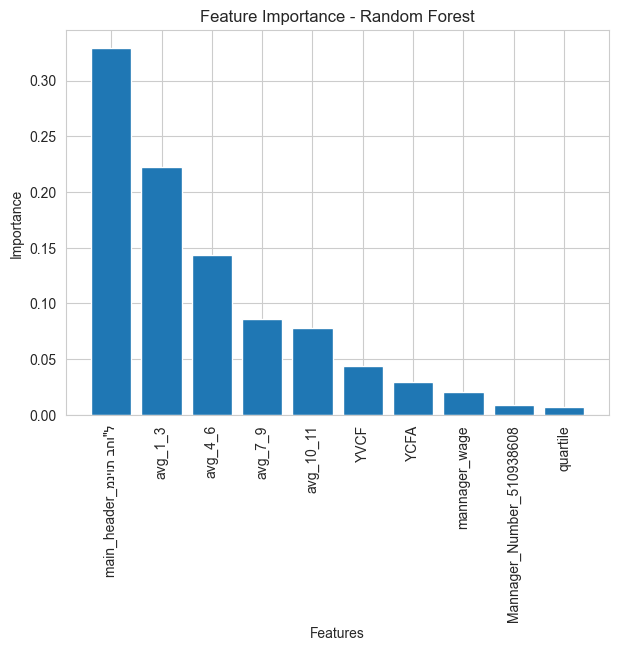

In [97]:
plot_feature_importance(best_est, Data_for_predict1.iloc[:, 1:],'Random Forest')

In [98]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.008130,0.063268
1,1,-0.003095,-0.001275
2,2,-0.001141,-0.002280
3,3,0.000669,0.000947
4,4,0.005507,0.001760
...,...,...,...
319,319,-0.000140,0.006119
320,320,-0.016429,0.010818
321,321,0.001844,-0.000496
322,322,-0.000541,0.000969


Measurements based on interval indexs
mae: 0.7469135802469136
mse: 2.388888888888889
rmse: 1.5456030825826172
mape: 8.803481830442616
r2: 0.5106876589002687


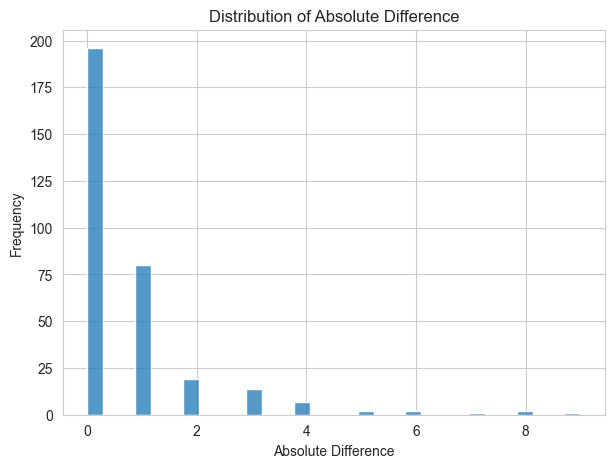

,Actual,Predicted
0,10,18
1,9,9
2,9,9
3,9,9
4,10,9
...,...,...
319,9,10
320,7,11
321,9,9
322,9,9


In [99]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'Random Forest',evaluation_metrics_intervals_df)
compare_df

#### Decision Tree

In [100]:
# Create a decision tree regressor
dtr = DecisionTreeRegressor()

# Set up a grid of hyperparameter values to search over
param_grid = {
    'max_depth': [3, 4 ,5, 7, 11],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 7],  # Minimum number of samples required to be at a leaf node
   
}


# Set up the grid search with 5-fold cross-validation
grid_search_dt = GridSearchCV(dtr, param_grid=param_grid, cv=5)

y_pred, best_est = execute(grid_search_dt, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'Decision Tree',evaluation_metrics_df)

Best parameter:  {'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 2}
Best score:  0.4663266547386152
mae: 0.006544264456729914
mse: 0.00017201348053838802
rmse: 0.013115390979242213
mape: 331.56210098441477
r2: 0.32470636232211136


|--- feature_26 <= 0.50
|   |--- feature_3 <= 0.04
|   |   |--- feature_3 <= -0.02
|   |   |   |--- value: [-0.02]
|   |   |--- feature_3 >  -0.02
|   |   |   |--- feature_2 <= -0.01
|   |   |   |   |--- value: [0.04]
|   |   |   |--- feature_2 >  -0.01
|   |   |   |   |--- feature_1 <= 0.01
|   |   |   |   |   |--- feature_3 <= -0.00
|   |   |   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |   |   |--- feature_7 <= 9.17
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.00
|   |   |   |   |   |   |   |   |   |--- value: [-0.00]
|   |   |   |   |   |   |   |   |--- feature_3 >  -0.00
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- feature_7 >  9.17
|   |   |   |   |   |   |   |   |--- value: [-0.01]
|   |   |   |   |   |   |--- feature_2 >  0.02
|   |   |   |   |   |   |   |--- value: [-0.03]
|   |   |   |   |   |--- feature_3 >  -0.00
|   |   |   |   |   |   |--- feature_0 <= 0.01
|   |   |   |   |   |   |   |--- feature_0 <= 0.00
| 

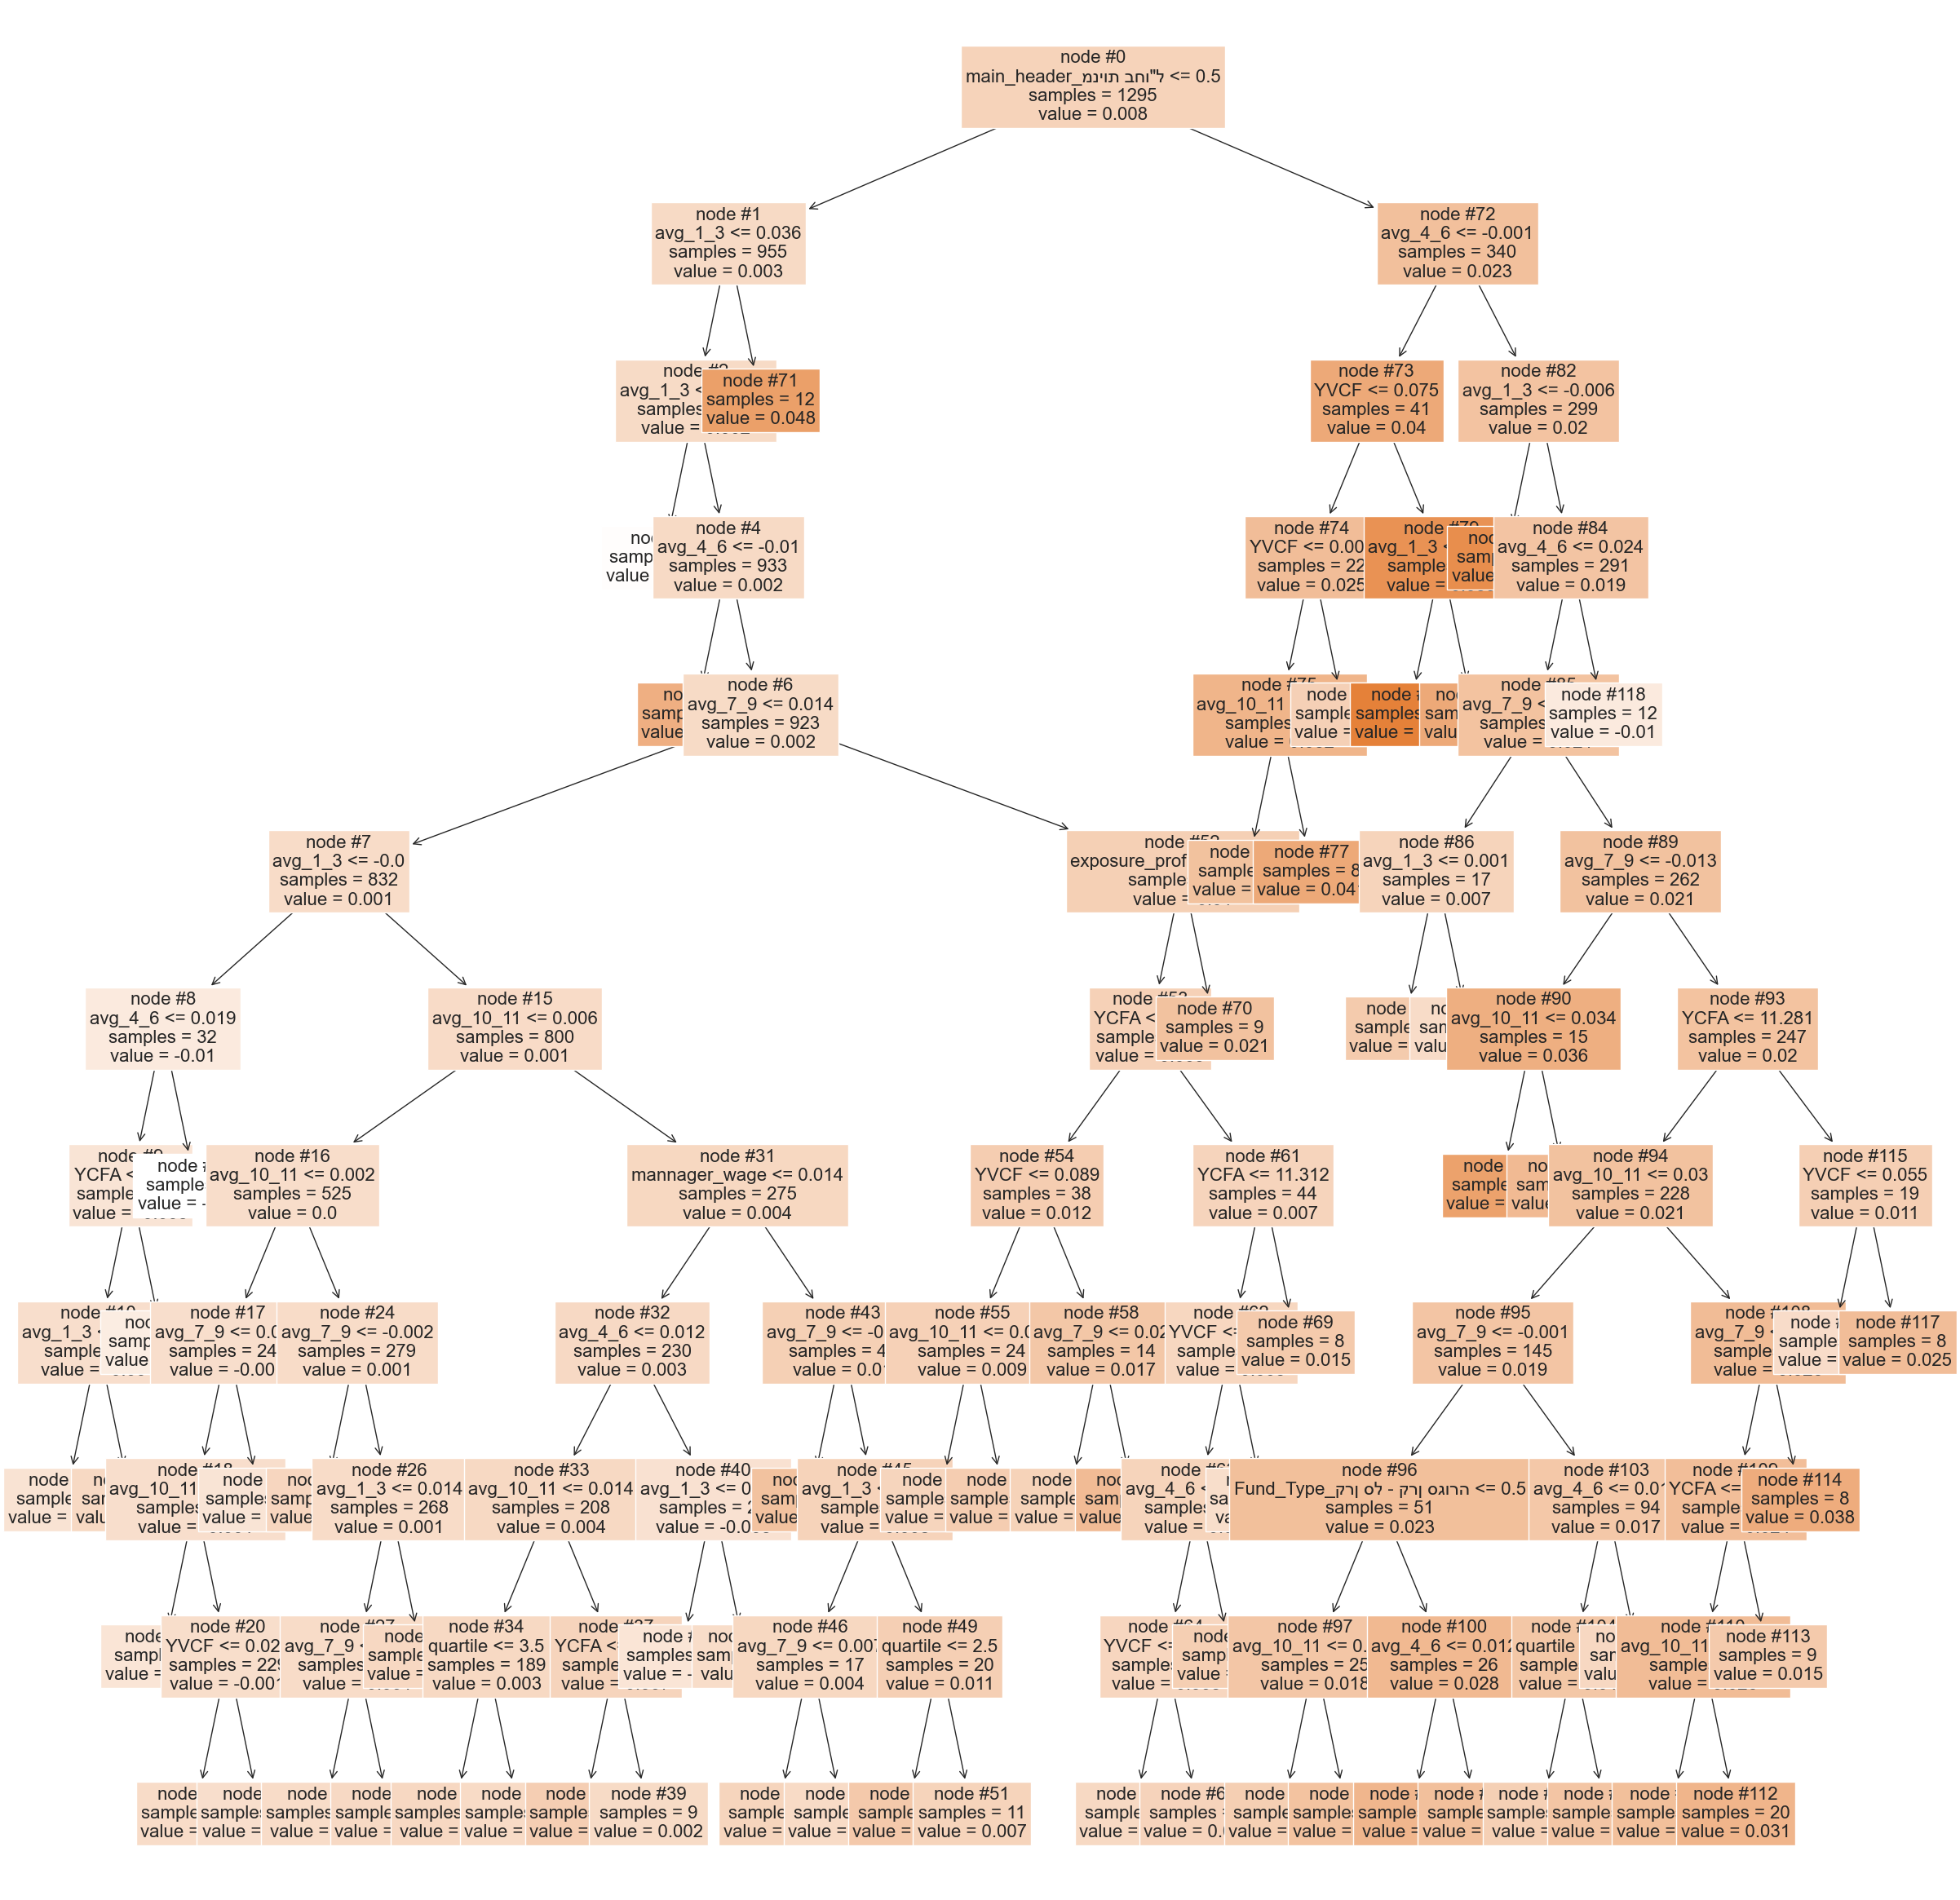

In [101]:
text_representation = tree.export_text(best_est)
print(text_representation)

fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(best_est, feature_names=Data_for_predict1.iloc[:, 1:].columns, filled=True, impurity=False, node_ids=True, fontsize=16)

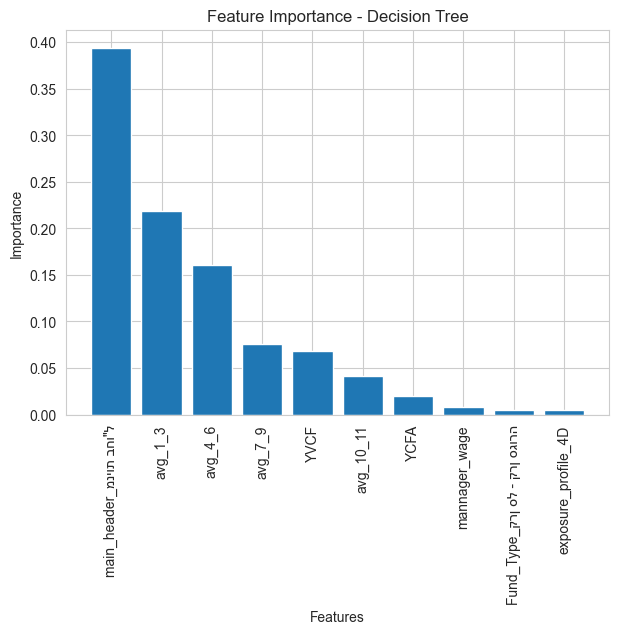

In [102]:
plot_feature_importance(best_est, Data_for_predict1.iloc[:, 1:],'Decision Tree')

In [103]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.008130,0.071849
1,1,-0.003095,-0.001008
2,2,-0.001141,-0.005462
3,3,0.000669,0.000614
4,4,0.005507,0.002865
...,...,...,...
319,319,-0.000140,-0.010286
320,320,-0.016429,0.035587
321,321,0.001844,-0.001008
322,322,-0.000541,0.000614


Measurements based on interval indexs
mae: 0.9104938271604939
mse: 3.441358024691358
rmse: 1.855089761896
mape: 10.542658468175897
r2: 0.29511206676201496


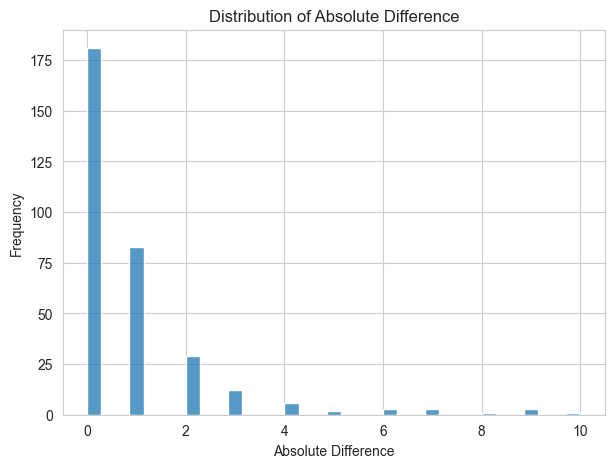

,Actual,Predicted
0,10,19
1,9,9
2,9,8
3,9,9
4,10,10
...,...,...
319,9,8
320,7,14
321,9,9
322,9,9


In [104]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'Decision Tree',evaluation_metrics_intervals_df)
compare_df

#### K-nearest Neighbours Regression

In [105]:
# Create a KNN regressor
knn = neighbors.KNeighborsRegressor()

# Set up the grid search with 5-fold cross-validation
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Set up the grid search with 5-fold cross-validation
grid_search_knn = GridSearchCV(knn, param_grid=param_grid, cv=5)

y_pred, best_est = execute(grid_search_knn, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'KNN',evaluation_metrics_df)

Best parameter:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best score:  0.32542936676538703
mae: 0.007653069828265014
mse: 0.00018082340965513207
rmse: 0.013447059517051751
mape: 752.8147655578623
r2: 0.2901201830162241


In [106]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.008130,0.019426
1,1,-0.003095,0.006858
2,2,-0.001141,0.001413
3,3,0.000669,0.001472
4,4,0.005507,-0.000190
...,...,...,...
319,319,-0.000140,0.020003
320,320,-0.016429,0.007549
321,321,0.001844,-0.000319
322,322,-0.000541,0.001567


Measurements based on interval indexs
mae: 1.0308641975308641
mse: 3.5246913580246915
rmse: 1.8774161387462
mape: 12.467400115820595
r2: 0.2780430316073731


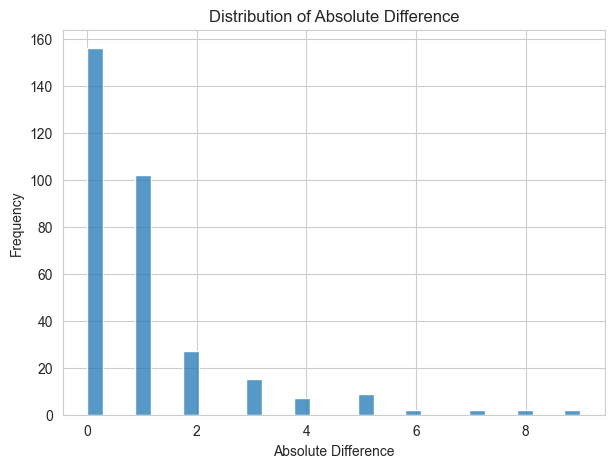

,Actual,Predicted
0,10,12
1,9,10
2,9,9
3,9,9
4,10,9
...,...,...
319,9,12
320,7,10
321,9,9
322,9,9


In [107]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'KNN',evaluation_metrics_intervals_df)
compare_df

### XGboost 

In [108]:
# Create a xgboost regressor
xgb = XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    "max_depth": [3, 4, 5, 7, 9, 11],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [50, 100, 200,1000]
}

# Set up the grid search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5)

y_pred, best_est = execute(grid_search_xgb, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'XGboost',evaluation_metrics_df)

Best parameter:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}
Best score:  0.6371917959884499
mae: 0.0055787787989675505
mse: 0.00012794023733798975
rmse: 0.011311067029152898
mape: 272.8114385843648
r2: 0.4977298988025397


In [109]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.008130,0.048683
1,1,-0.003095,0.002118
2,2,-0.001141,-0.005155
3,3,0.000669,0.000529
4,4,0.005507,0.003144
...,...,...,...
319,319,-0.000140,0.011144
320,320,-0.016429,-0.005042
321,321,0.001844,-0.000494
322,322,-0.000541,0.001506


Measurements based on interval indexs
mae: 0.7407407407407407
mse: 2.5123456790123457
rmse: 1.5850380686319006
mape: 9.927347550577396
r2: 0.4854001994119105


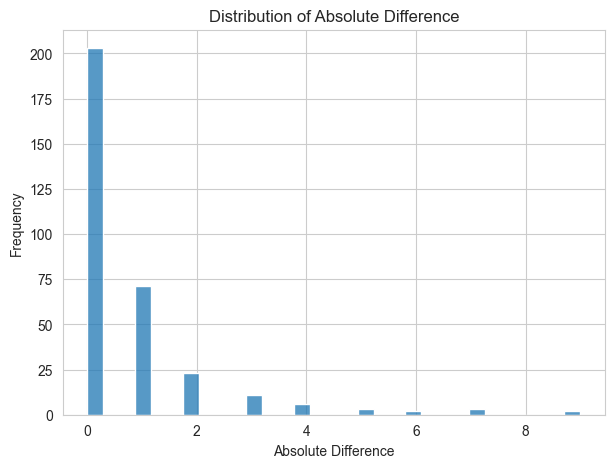

,Actual,Predicted
0,10,16
1,9,9
2,9,8
3,9,9
4,10,10
...,...,...
319,9,11
320,7,8
321,9,9
322,9,9


In [110]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'XGboost',evaluation_metrics_intervals_df)
compare_df

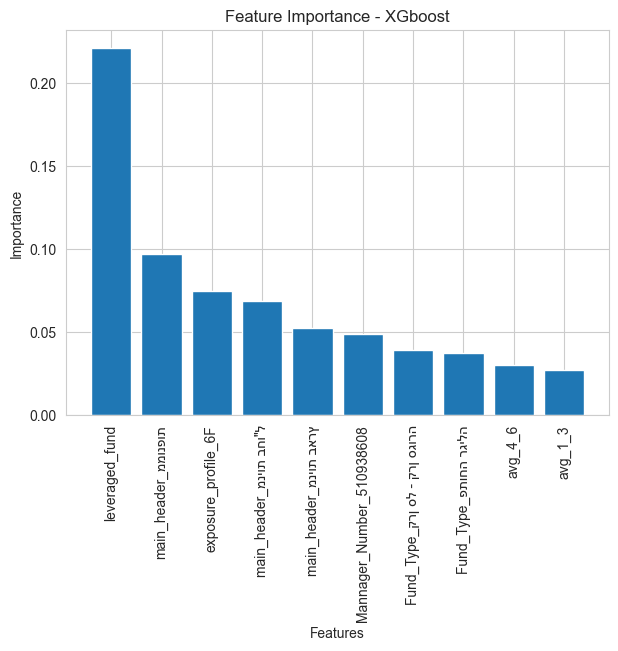

In [111]:
plot_feature_importance(best_est, Data_for_predict1.iloc[:, 1:],'XGboost')

In [112]:
evaluation_metrics_df

,Linear Regression,Lasso Regression,Random Forest,Decision Tree,KNN,XGboost
MAE,0.006993,0.007660,0.005448,0.006544,0.007653,0.005579
MSE,0.000149,0.000174,0.000116,0.000172,0.000181,0.000128
RMSE,0.012219,0.013194,0.010756,0.013115,0.013447,0.011311
MAPE,842.361228,411.567468,299.574193,331.562101,752.814766,272.811439
R2,0.413833,0.316544,0.545834,0.324706,0.290120,0.497730


In [113]:
evaluation_metrics_intervals_df

,Linear Regression,Lasso Regression,Random Forest,Decision Tree,KNN,XGboost
MAE,0.956790,1.061728,0.746914,0.910494,1.030864,0.740741
MSE,3.000000,3.450617,2.388889,3.441358,3.524691,2.512346
RMSE,1.732051,1.857584,1.545603,1.855090,1.877416,1.585038
MAPE,11.072461,12.779701,8.803482,10.542658,12.467400,9.927348
R2,0.385515,0.293216,0.510688,0.295112,0.278043,0.485400


## Yearly yield forecast

Preparing a data set for the prediction

In [114]:
#average_yield12_months = yield_data
#average_yield12_months = average_yield12_months.groupby(['Fund_Number'])['yield'].mean().reset_index(name='average_yield12')

year_predict_yield = predict_yield.drop('yield',axis=1)
year_predict_yield = pd.merge(year_predict_yield,year_yield,on =['Fund_Number'],how ="left") #הוספת התשואה השתנית 
#year_predict_yield = pd.merge(year_predict_yield,average_yield12_months,on =['Fund_Number'],how ="left")#הוספת משתנה: תשואה ממוצעת עבור חודש 1-12 
year_predict_yield['Yearly_yield'] = year_predict_yield['Yearly_yield']/100
Data_for_predict2 =year_predict_yield

Data_for_predict2 = Data_for_predict2.drop('Fund_Number',axis=1)
Data_for_predict2 = Data_for_predict2.drop('avg_10_11',axis=1)
Data_for_predict2 = Data_for_predict2.drop('avg_7_9',axis=1)
Data_for_predict2 = Data_for_predict2.drop('avg_4_6',axis=1)
Data_for_predict2 = Data_for_predict2.drop('avg_1_3',axis=1)


Data_for_predict2 = swap_columns(Data_for_predict2, 'Yearly_yield' , 'mannager_wage')
#Data_for_predict2 = swap_columns(Data_for_predict2, 'trustee_salary' , 'average_yield12')
#Data_for_predict2 = swap_columns(Data_for_predict2, 'trustee_salary' , 'average_yield12')

Data_for_predict2.rename(columns={'Yield':'year_yield'}, inplace=True)

Data_for_predict2

,Yearly_yield,trustee_salary,quartile,YCFA,YVCF,Fund_Type_פתוחה רגילה,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,Fund_Type_קרן מחקה - קרן פתוחה,Fund_Type_קרן סל - קרן סגורה,"main_header_אג""ח בארץ - חברות והמרה",...,Mannager_Number_513765339,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund,mannager_wage
0,-1.0000,0.0010,4,3.118902,0.168113,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0130
1,0.1484,0.0002,4,14.004202,0.048471,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.0025
2,0.2111,0.0002,4,12.322446,0.050975,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.0020
3,0.2626,0.0002,4,11.215686,0.050390,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.0050
4,0.3484,0.0003,4,7.705069,0.098188,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.0080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,0.0439,0.0004,3,4.555154,0.139609,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0055
1627,0.0890,0.0004,2,2.772071,0.109024,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0055
1628,0.0591,0.0004,3,1.506567,0.081203,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0060
1629,-0.0600,0.0003,2,4.714286,0.029433,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0078


In [115]:
Data_for_predict2

,Yearly_yield,trustee_salary,quartile,YCFA,YVCF,Fund_Type_פתוחה רגילה,Fund_Type_קרן טכנולוגיה עילית - קרן סגורה,Fund_Type_קרן מחקה - קרן פתוחה,Fund_Type_קרן סל - קרן סגורה,"main_header_אג""ח בארץ - חברות והמרה",...,Mannager_Number_513765339,Mannager_Number_513846808,Mannager_Number_514884485,Mannager_Number_515430999,leveraged_fund,Imitator_fund,kosher,Reverse_exposure_fund,Fixed_deadlines_fund,mannager_wage
0,-1.0000,0.0010,4,3.118902,0.168113,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0130
1,0.1484,0.0002,4,14.004202,0.048471,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.0025
2,0.2111,0.0002,4,12.322446,0.050975,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.0020
3,0.2626,0.0002,4,11.215686,0.050390,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.0050
4,0.3484,0.0003,4,7.705069,0.098188,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.0080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,0.0439,0.0004,3,4.555154,0.139609,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0055
1627,0.0890,0.0004,2,2.772071,0.109024,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0055
1628,0.0591,0.0004,3,1.506567,0.081203,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0060
1629,-0.0600,0.0003,2,4.714286,0.029433,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0078


In [116]:
 Data_for_predict2[['Yearly_yield','YCFA','YVCF','quartile','trustee_salary','mannager_wage','Fund_Type_פתוחה רגילה','Mannager_Number_510791031', 'exposure_profile_4D']]

,Yearly_yield,YCFA,YVCF,quartile,trustee_salary,mannager_wage,Fund_Type_פתוחה רגילה,Mannager_Number_510791031,exposure_profile_4D
0,-1.0000,3.118902,0.168113,4,0.0010,0.0130,0,1,0
1,0.1484,14.004202,0.048471,4,0.0002,0.0025,0,0,0
2,0.2111,12.322446,0.050975,4,0.0002,0.0020,0,0,0
3,0.2626,11.215686,0.050390,4,0.0002,0.0050,0,0,0
4,0.3484,7.705069,0.098188,4,0.0003,0.0080,0,0,0
...,...,...,...,...,...,...,...,...,...
1626,0.0439,4.555154,0.139609,3,0.0004,0.0055,1,0,0
1627,0.0890,2.772071,0.109024,2,0.0004,0.0055,1,0,0
1628,0.0591,1.506567,0.081203,3,0.0004,0.0060,1,0,0
1629,-0.0600,4.714286,0.029433,2,0.0003,0.0078,1,0,0


In [117]:
Data_for_predict2.info()
# There are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 0 to 1630
Data columns (total 85 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Yearly_yield                               1631 non-null   float64
 1   trustee_salary                             1631 non-null   float64
 2   quartile                                   1631 non-null   int32  
 3   YCFA                                       1631 non-null   float64
 4   YVCF                                       1631 non-null   float64
 5   Fund_Type_פתוחה רגילה                      1631 non-null   uint8  
 6   Fund_Type_קרן טכנולוגיה עילית - קרן סגורה  1631 non-null   uint8  
 7   Fund_Type_קרן מחקה - קרן פתוחה             1631 non-null   uint8  
 8   Fund_Type_קרן סל - קרן סגורה               1631 non-null   uint8  
 9   main_header_אג"ח בארץ - חברות והמרה        1631 non-null   uint8  
 10  main_header_אג"ח בארץ - 

In [118]:
yearly_metrics_df = pd.DataFrame(index=['MAE','MSE','RMSE','MAPE','R2'])

In [119]:
yearly_intervals_metrics_df = pd.DataFrame(index=['MAE','MSE','RMSE','MAPE','R2'])

#### 

Dependent and Independent variables

In [120]:
Xyear = Data_for_predict2.iloc[:, 1:].values
Yyear = Data_for_predict2.iloc[:,0:1].values

Training and testing sets 

In [121]:
x_train, x_test, y_train, y_test = train_test_split(Xyear, Yyear,test_size=0.2,random_state=0)

Standardization

In [122]:
scaler = StandardScaler()
scaler = StandardScaler().fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[-0.23495189,  0.24212843, -0.92478925, ..., -0.09223528,
        -0.04801998,  0.75499691],
       [ 0.64476002,  0.24212843, -1.05519906, ..., -0.09223528,
        -0.04801998, -0.02383337],
       [ 1.52447193,  0.24212843, -1.24390934, ..., -0.09223528,
        -0.04801998, -0.26086867],
       ...,
       [ 0.64476002,  1.19890259, -1.57485483, ..., -0.09223528,
        -0.04801998,  0.14547756],
       [ 2.40418383, -1.6714199 , -0.46858412, ..., -0.09223528,
        -0.04801998,  3.49783396],
       [-0.23495189, -0.71464573,  0.24073826, ..., -0.09223528,
        -0.04801998, -0.81959474]])

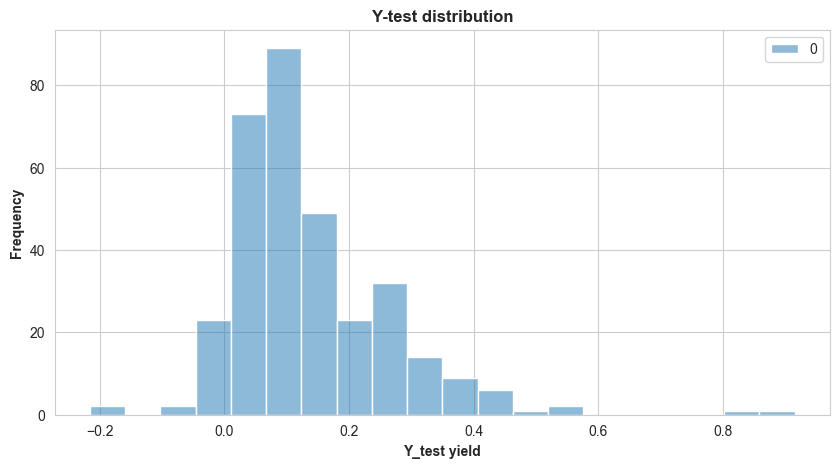

In [123]:
plot_y_test_dist(y_test, NUM_OF_INTERVALS)

In [124]:
Data_for_predict2.iloc[:,0:1].describe()

,Yearly_yield
count,1631.000000
mean,0.124139
std,0.131870
min,-1.000000
25%,0.055250
50%,0.091000
75%,0.190450
max,1.147500


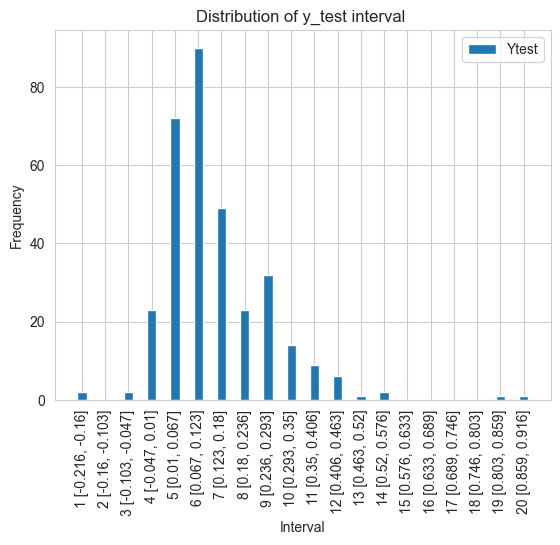

,Interval,Count of samples
"(-0.216, -0.16]",1,2
"(-0.16, -0.103]",2,0
"(-0.103, -0.0466]",3,2
"(-0.0466, 0.00998]",4,23
"(0.00998, 0.0666]",5,72
"(0.0666, 0.123]",6,90
"(0.123, 0.18]",7,49
"(0.18, 0.236]",8,23
"(0.236, 0.293]",9,32
"(0.293, 0.35]",10,14


In [125]:
y_test = y_test.flatten().tolist()
interval, interval_range, labels, y_test_intervals = build_intervals(y_test, NUM_OF_INTERVALS)
interval

In [126]:
# interval range:

print ("interval range: ",round(0.576-0.633,4))

interval range:  -0.057


#### 

#### Linear Regression

In [128]:
lrm_regressor = LinearRegression()

y_pred, best_est = execute(lrm_regressor, x_train, y_train)
y_pred = lrm_regressor.predict(x_test) # Linear Regression is a bit different

mse, mae, rmse, r2, mape = meas(y_test, y_pred,'Linear Regression',yearly_metrics_df)

mae: 0.05193822866571924
mse: 0.007536176573855414
rmse: 0.08681115466260897
mape: 820.184929092908
r2: 0.5410547308494592


In [129]:
# print regression coefficients

reg_coef = pd.DataFrame({"Feature":Data_for_predict2.iloc[:, 1:].columns.tolist(),"Coefficients":lrm_regressor.coef_[0]})
reg_coef = reg_coef.sort_values('Coefficients', ascending=(False))
reg_coef.head(30)

,Feature,Coefficients
0,trustee_salary,55.021165
18,main_header_ממונפות,0.435660
78,leveraged_fund,0.317285
4,Fund_Type_פתוחה רגילה,0.230896
48,exposure_profile_4C,0.203694
79,Imitator_fund,0.183198
50,exposure_profile_5C,0.141965
16,main_header_גמישות,0.106293
41,exposure_profile_3A,0.098833
47,exposure_profile_4B,0.098529


In [130]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.1665,0.076391
1,1,0.0428,0.058344
2,2,0.0533,0.035334
3,3,0.3633,0.265489
4,4,0.2048,0.232192
...,...,...,...
322,322,0.0569,0.099905
323,323,0.1352,0.069728
324,324,0.0079,-0.003229
325,325,0.4501,0.402631


Measurements based on interval indexs
mae: 0.8807339449541285
mse: 2.3425076452599387
rmse: 1.530525284096914
mape: 12.490542792329368
r2: 0.5456520950480682


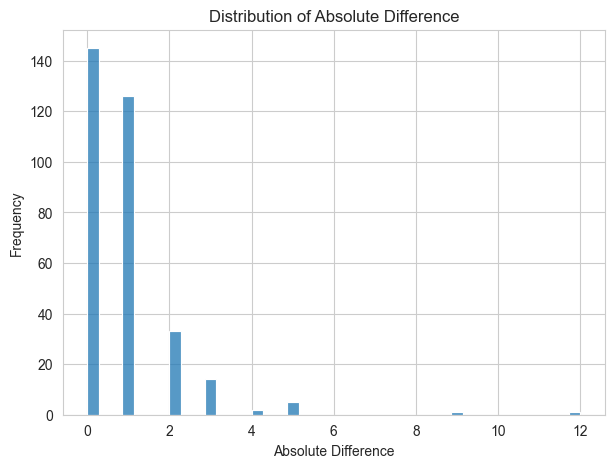

,Actual,Predicted
0,7,6
1,5,5
2,5,5
3,11,9
4,8,8
...,...,...
322,5,6
323,7,6
324,4,4
325,12,11


In [131]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'Linear Regression',yearly_intervals_metrics_df)
compare_df

#### Lasso Regression

In [132]:
# Create a Lasso regression model
lasso = Lasso()

# Set up a grid of hyperparameter values to search over
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 0.2, 0.5, 1, 5, 10]}

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(lasso, param_grid=param_grid, cv=5)

y_pred, best_est = execute(grid_search, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'Lasso Regression',yearly_metrics_df)

Best parameter:  {'alpha': 0.0001}
Best score:  0.48615821977215123
mae: 0.05178312643600474
mse: 0.007357913914466252
rmse: 0.08577828346654094
mape: 356.3185236659536
r2: 0.5519107403114292


In [133]:
# print lasso coefficients
lasso_coef = pd.DataFrame({"Feature":Data_for_predict2.iloc[:, 1:].columns.tolist(),"Coefficients":best_est.coef_})
lasso_coef = lasso_coef.sort_values('Coefficients', ascending=(False))
lasso_coef.head(30)

,Feature,Coefficients
18,main_header_ממונפות,0.304261
78,leveraged_fund,0.264476
48,exposure_profile_4C,0.115256
16,main_header_גמישות,0.100040
20,main_header_מניות בארץ,0.099350
46,exposure_profile_4A,0.087858
47,exposure_profile_4B,0.083029
21,"main_header_מניות בחו""ל",0.059082
79,Imitator_fund,0.038978
42,exposure_profile_3B,0.030478


In [134]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.1665,0.075779
1,1,0.0428,0.059357
2,2,0.0533,0.042770
3,3,0.3633,0.270405
4,4,0.2048,0.233409
...,...,...,...
322,322,0.0569,0.098604
323,323,0.1352,0.071883
324,324,0.0079,-0.004554
325,325,0.4501,0.365181


Measurements based on interval indexs
mae: 0.8837920489296636
mse: 2.3394495412844036
rmse: 1.529525920435611
mape: 12.602992622306964
r2: 0.5462452385271177


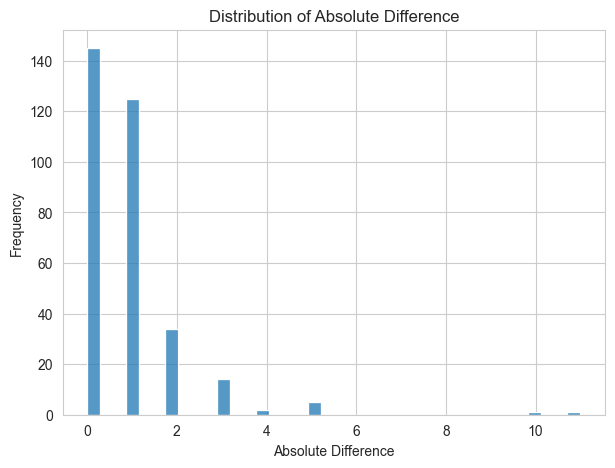

,Actual,Predicted
0,7,6
1,5,5
2,5,5
3,11,9
4,8,8
...,...,...
322,5,6
323,7,6
324,4,4
325,12,11


In [135]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'Lasso Regression',yearly_intervals_metrics_df)
compare_df

#### Random Forest

In [136]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 400, 1000],  # Number of trees in the forest
    'max_depth': [5, 7, 11],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 7],  # Minimum number of samples required to be at a leaf node
    
}


# Create a random forest classifier
rf = RandomForestRegressor()

# Set up the grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf, param_grid, cv=5)

y_pred, best_est = execute(grid_search_rf, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'Random Forest',yearly_metrics_df)

Best parameter:  {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score:  0.5123104868334634
mae: 0.048031458603940994
mse: 0.005325722786856846
rmse: 0.07297754988252789
mape: 354.90197981605706
r2: 0.6756690539451157


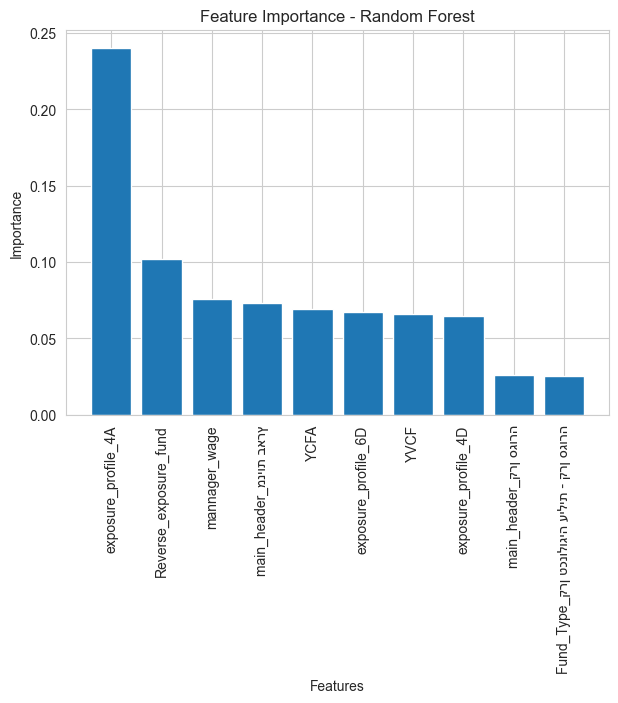

In [137]:
plot_feature_importance(best_est, Data_for_predict2.iloc[:, 1:],'Random Forest')

In [138]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.1665,0.068174
1,1,0.0428,0.067887
2,2,0.0533,0.061212
3,3,0.3633,0.256467
4,4,0.2048,0.220978
...,...,...,...
322,322,0.0569,0.080017
323,323,0.1352,0.069185
324,324,0.0079,-0.003725
325,325,0.4501,0.334703


Measurements based on interval indexs
mae: 0.8746177370030581
mse: 1.8470948012232415
rmse: 1.3590786589536463
mape: 12.828820722350418
r2: 0.6417413386540903


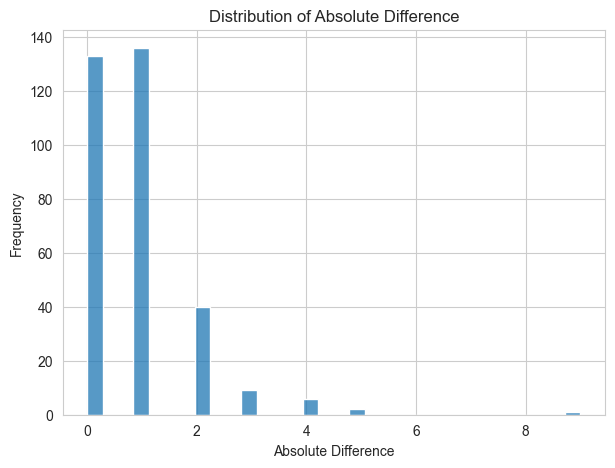

,Actual,Predicted
0,7,6
1,5,6
2,5,5
3,11,9
4,8,8
...,...,...
322,5,6
323,7,6
324,4,4
325,12,10


In [139]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'Random Forest',yearly_intervals_metrics_df)
compare_df

#### DecisionTree

In [140]:
# Create a decision tree regressor
dtr = DecisionTreeRegressor()

# Set up a grid of hyperparameter values to search over
param_grid = {
    'max_depth': [5, 7, 11],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 7],  # Minimum number of samples required to be at a leaf node
   
}


# Set up the grid search with 5-fold cross-validation
grid_search_dt = GridSearchCV(dtr, param_grid=param_grid, cv=5)

y_pred, best_est = execute(grid_search_dt, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'Decision Tree',yearly_metrics_df)

Best parameter:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score:  0.4654183661150113
mae: 0.0528121758799935
mse: 0.007343372956201745
rmse: 0.08569348257715838
mape: 412.0614788641207
r2: 0.5527962694572777


In [141]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.1665,0.066632
1,1,0.0428,0.066632
2,2,0.0533,0.066632
3,3,0.3633,0.242951
4,4,0.2048,0.242951
...,...,...,...
322,322,0.0569,0.066632
323,323,0.1352,0.066632
324,324,0.0079,0.066632
325,325,0.4501,0.066632


|--- feature_46 <= 0.50
|   |--- feature_81 <= 0.50
|   |   |--- feature_54 <= 0.50
|   |   |   |--- feature_20 <= 0.50
|   |   |   |   |--- feature_49 <= 0.50
|   |   |   |   |   |--- value: [0.07]
|   |   |   |   |--- feature_49 >  0.50
|   |   |   |   |   |--- value: [0.16]
|   |   |   |--- feature_20 >  0.50
|   |   |   |   |--- feature_3 <= 0.41
|   |   |   |   |   |--- value: [0.27]
|   |   |   |   |--- feature_3 >  0.41
|   |   |   |   |   |--- value: [-0.07]
|   |   |--- feature_54 >  0.50
|   |   |   |--- value: [0.89]
|   |--- feature_81 >  0.50
|   |   |--- feature_54 <= 0.50
|   |   |   |--- value: [-0.21]
|   |   |--- feature_54 >  0.50
|   |   |   |--- value: [-0.65]
|--- feature_46 >  0.50
|   |--- feature_2 <= 11.26
|   |   |--- feature_2 <= 11.04
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- feature_0 <= 0.00
|   |   |   |   |   |--- value: [0.24]
|   |   |   |   |--- feature_0 >  0.00
|   |   |   |   |   |--- value: [0.28]
|   |   |   |--- feature_6 >  0.50


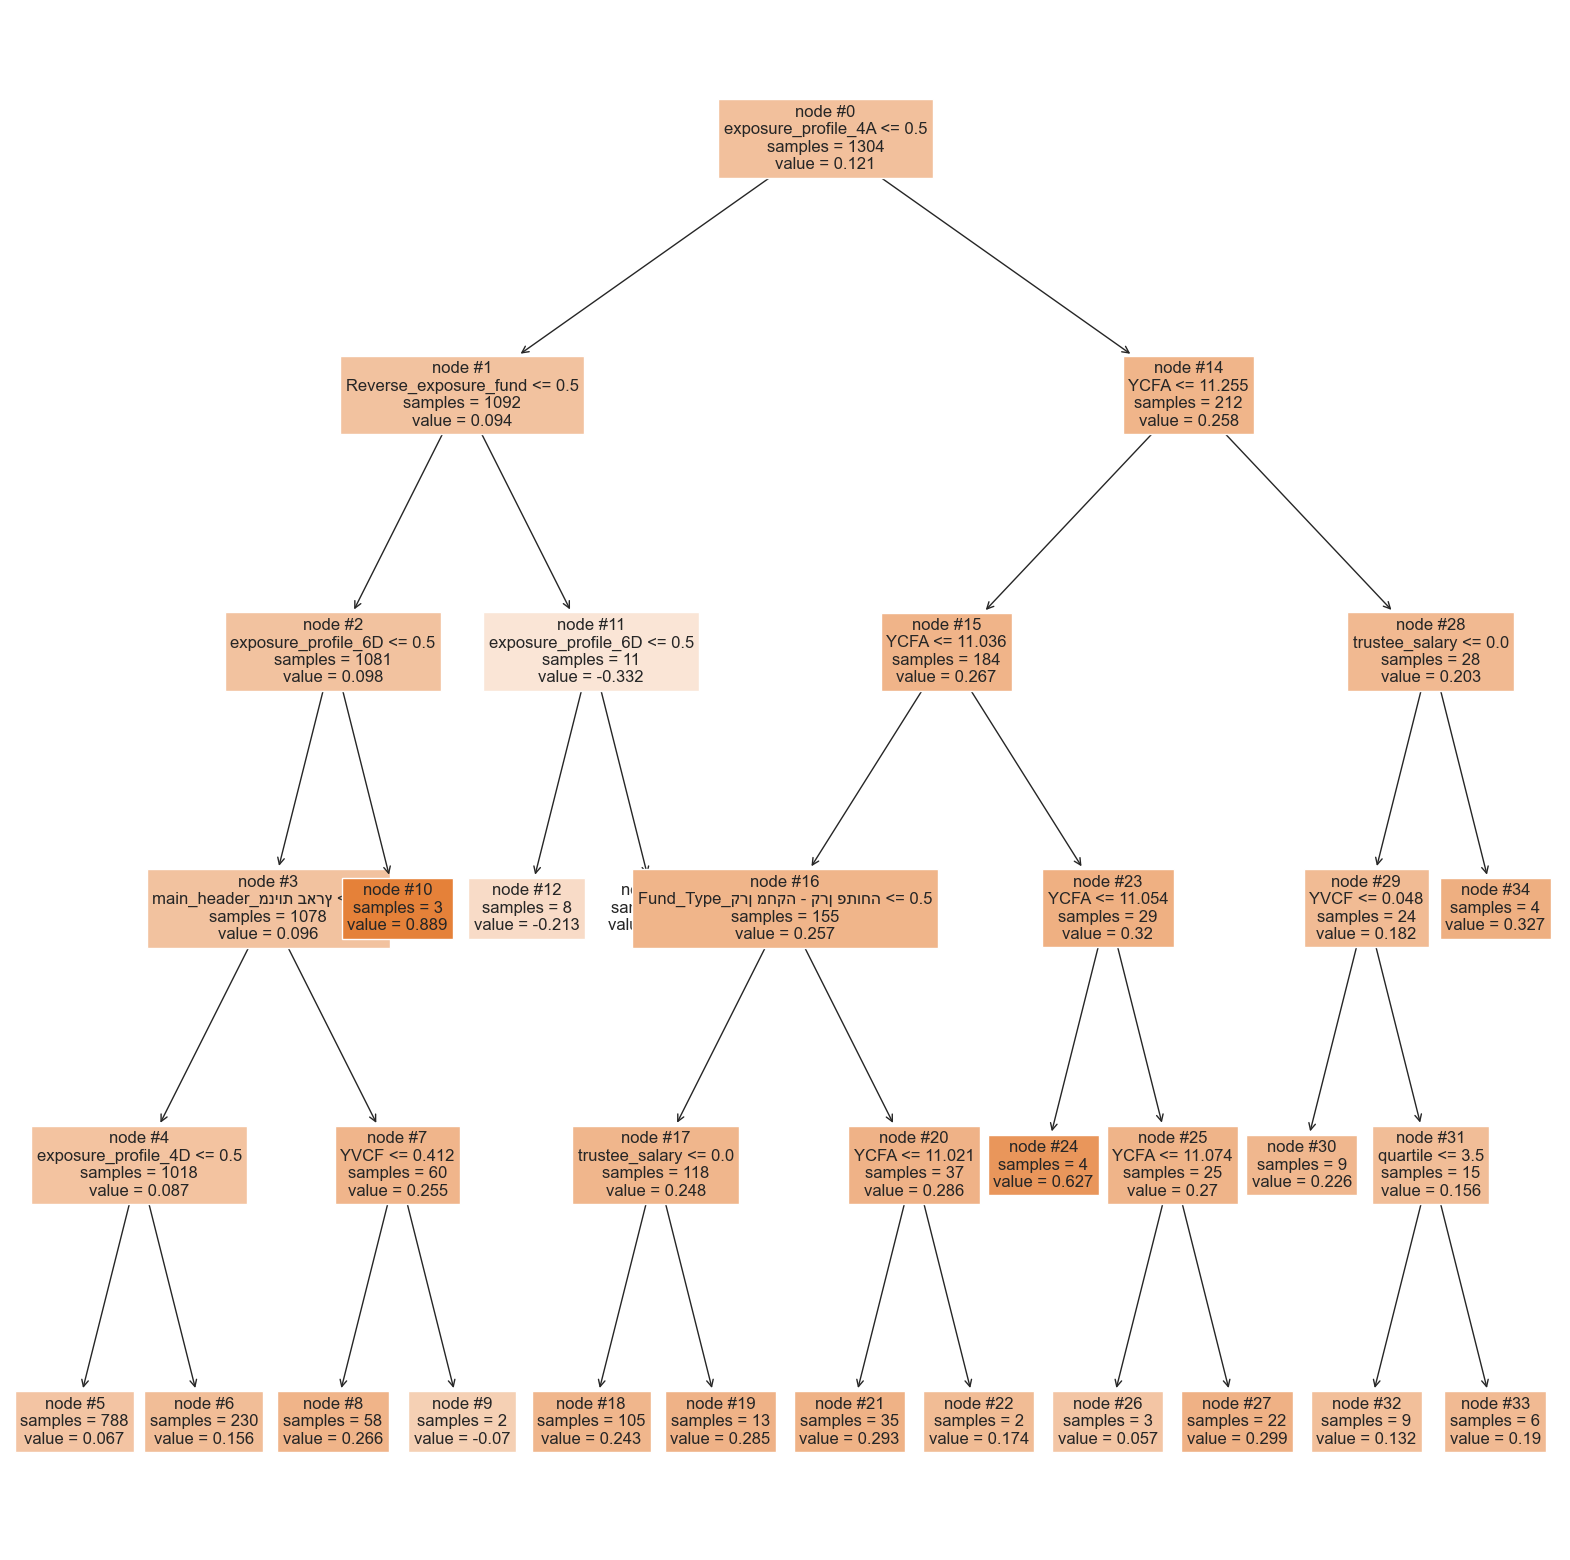

In [142]:
text_representation = tree.export_text(best_est)
print(text_representation)

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(best_est, feature_names=Data_for_predict2.iloc[:, 1:].columns, filled=True, impurity=False, node_ids=True, fontsize=12)

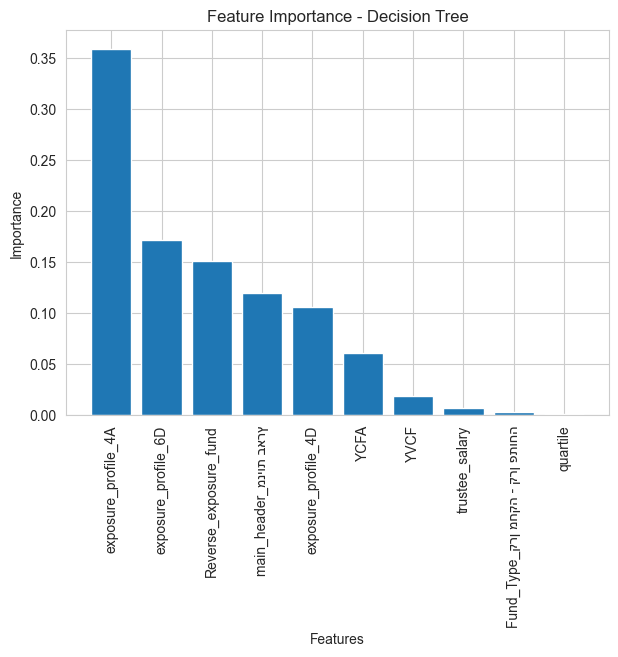

In [143]:
plot_feature_importance(best_est, Data_for_predict2.iloc[:, 1:],'Decision Tree',)

Measurements based on interval indexs
mae: 0.9785932721712538
mse: 2.4403669724770642
rmse: 1.5621673957924818
mape: 15.559588309467594
r2: 0.5266715037184836


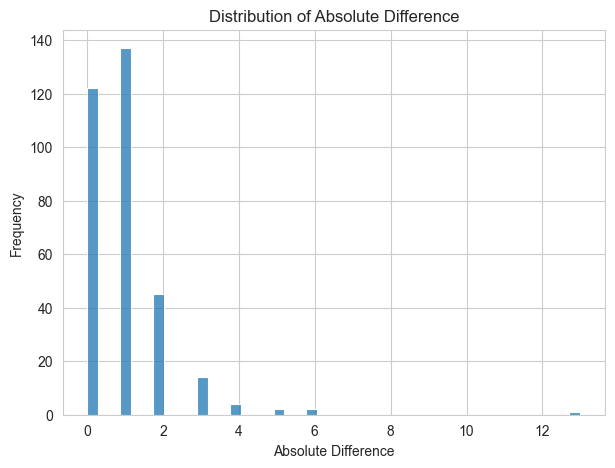

,Actual,Predicted
0,7,6
1,5,6
2,5,6
3,11,9
4,8,9
...,...,...
322,5,6
323,7,6
324,4,6
325,12,6


In [144]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'Decision Tree',yearly_intervals_metrics_df)
compare_df

#### K-nearest Neighbours Regression

In [145]:
# Create a KNN regressor
knn = neighbors.KNeighborsRegressor()

# Set up the grid search with 5-fold cross-validation
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Set up the grid search with 5-fold cross-validation
grid_search_knn = GridSearchCV(knn, param_grid=param_grid, cv=5)

y_pred, best_est = execute(grid_search_knn, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'KNN',yearly_metrics_df)

Best parameter:  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best score:  0.3735389180476627
mae: 0.06145586136595311
mse: 0.011251588250084947
rmse: 0.10607350399645026
mape: 817.0525128023162
r2: 0.3147900467564907


In [146]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.1665,0.071567
1,1,0.0428,0.040433
2,2,0.0533,0.028733
3,3,0.3633,0.222000
4,4,0.2048,0.245033
...,...,...,...
322,322,0.0569,0.095400
323,323,0.1352,0.049900
324,324,0.0079,-0.023300
325,325,0.4501,0.143900


Measurements based on interval indexs
mae: 1.073394495412844
mse: 3.5688073394495414
rmse: 1.8891287249548512
mape: 15.726232474180325
r2: 0.307801559949211


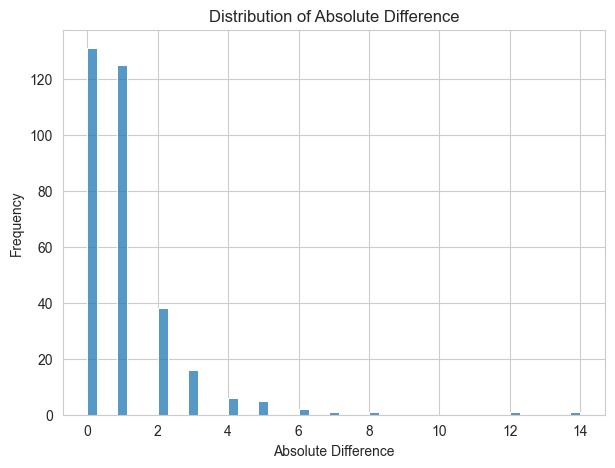

,Actual,Predicted
0,7,6
1,5,5
2,5,5
3,11,8
4,8,9
...,...,...
322,5,6
323,7,5
324,4,4
325,12,7


In [147]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'KNN',yearly_intervals_metrics_df)
compare_df

### XGboost

In [148]:
# Create a xgboost regressor
xgb = XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    "max_depth": [3, 4, 5, 7, 9, 11],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [50, 100, 200,1000]
}

# Set up the grid search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5)

y_pred, best_est = execute(grid_search_xgb, x_train, y_train)
mse, mae, rmse, r2, mape = meas(y_test, y_pred,'XGboost',yearly_metrics_df)

Best parameter:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best score:  0.5000111857277402
mae: 0.04795658010919593
mse: 0.005364614696352196
rmse: 0.07324353006479273
mape: 325.79727405659526
r2: 0.673300577344787


In [149]:
test, y_pred = create_test_df(y_test,y_pred)
test

,index,y_test,y_pred
0,0,0.1665,0.084064
1,1,0.0428,0.074719
2,2,0.0533,0.059731
3,3,0.3633,0.257681
4,4,0.2048,0.238150
...,...,...,...
322,322,0.0569,0.086049
323,323,0.1352,0.080584
324,324,0.0079,0.004658
325,325,0.4501,0.365847


Measurements based on interval indexs
mae: 0.8440366972477065
mse: 1.7859327217125383
rmse: 1.3363879383294877
mape: 12.45122489328187
r2: 0.6536042082350808


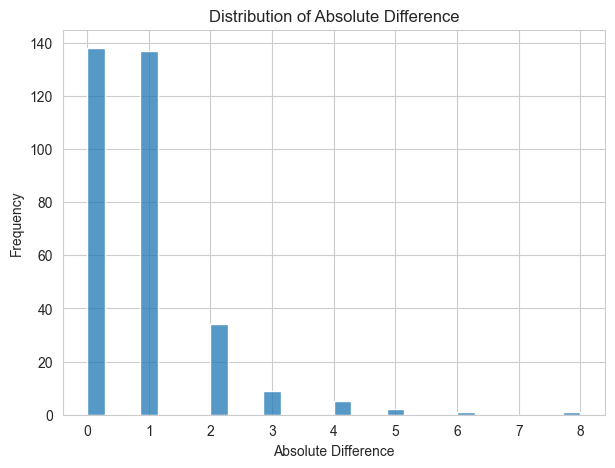

,Actual,Predicted
0,7,6
1,5,6
2,5,5
3,11,9
4,8,9
...,...,...
322,5,6
323,7,6
324,4,4
325,12,11


In [150]:
compare_df, y_pred_intervals = measure_binned_model(y_pred, interval_range, labels, y_test_intervals, test, NUM_OF_INTERVALS,'XGboost',yearly_intervals_metrics_df)
compare_df

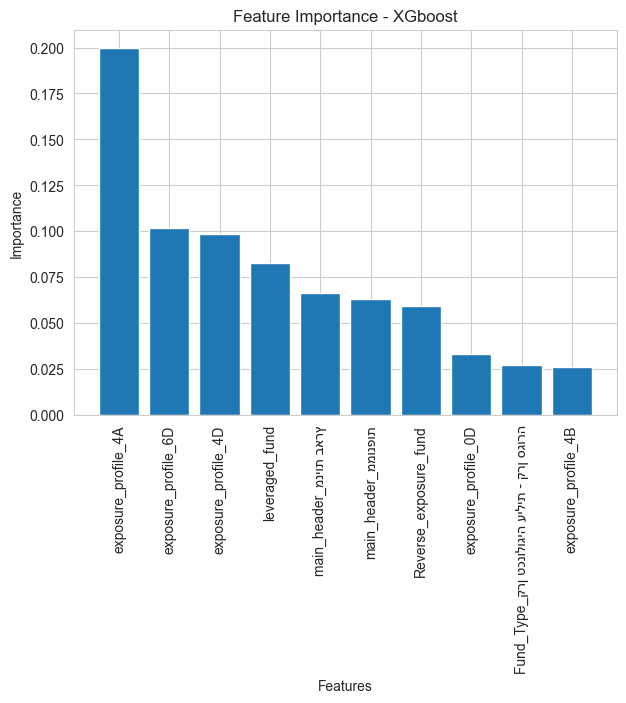

In [151]:
plot_feature_importance(best_est, Data_for_predict2.iloc[:, 1:],'XGboost')

In [152]:
yearly_metrics_df

,Linear Regression,Lasso Regression,Random Forest,Decision Tree,KNN,XGboost
MAE,0.051938,0.051783,0.048031,0.052812,0.061456,0.047957
MSE,0.007536,0.007358,0.005326,0.007343,0.011252,0.005365
RMSE,0.086811,0.085778,0.072978,0.085693,0.106074,0.073244
MAPE,820.184929,356.318524,354.901980,412.061479,817.052513,325.797274
R2,0.541055,0.551911,0.675669,0.552796,0.314790,0.673301


In [153]:
yearly_intervals_metrics_df

,Linear Regression,Lasso Regression,Random Forest,Decision Tree,KNN,XGboost
MAE,0.880734,0.883792,0.874618,0.978593,1.073394,0.844037
MSE,2.342508,2.339450,1.847095,2.440367,3.568807,1.785933
RMSE,1.530525,1.529526,1.359079,1.562167,1.889129,1.336388
MAPE,12.490543,12.602993,12.828821,15.559588,15.726232,12.451225
R2,0.545652,0.546245,0.641741,0.526672,0.307802,0.653604
